# Problem Statement

From the Ames Housing Dataset, the aim is to create a regression model that can predict the price of a house at sale based on the SalePrice and variables available. The model should have the RMSE (root mean squared error) score as close to 0 as possible. A small RMSE score implies that the model is able to predict the price of the house at sale accurately. The variables that will be selected to build the best regression model will be based on the Exploratory Data Analysis.

In [113]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

### Import data and name it as 'ames'

In [114]:
# import data
ames = pd.read_csv('./datasets/train.csv')


# Data Dictionary

|Feature Name|Dataset|Description|
|---|---|---|
|ID|ames| Unique ID number for each entry.
|PID|ames|Individual homes that can be referenced directly from the Ames City Assessor webpage.|
|MS SubClass|ames|Identifies the type of dwelling involved in the sale.|
|MS Zoning|ames|Identifies the general zoning classification of the sale.|
|Lot Frontage|ames|Linear feet of street connected to property.|
|Lot Area|ames|Lot size in square feet.|
|Street|ames|Type of road access to property.|
|Alley|ames|Type of alley access to property.|
|Lot Shape|ames|General shape of property.|
|Land Contour|ames|Flatness of the property.|
|Utilities|ames|Type of utilities available.|
|Lot Config|ames|Lot configuration.|
|Land Slope|ames|Slope of property.|
|Neighborhood|ames|Physical locations within Ames city limits.|
|Condition1|ames|Proximity to various conditions.|
|Condition2|ames|Proximity to various conditions (if more than one is present).|
|Bldg Type|ames|Type of dwelling.|
|House Style|ames|Style of dwelling.|
|Overall Qual|ames|Rates the overall material and finish of the house.|
|Overall Cond|ames|Rates the overall condition of the house.|
|Year Built|ames|Original construction date.|
|Year Remod/Add|ames|Identifies the general zoning classification of the sale.|
|Roof Style|ames|Type of roof.|
|Roof Matl|ames|Roof material.|
|Exterior 1st|ames|Exterior covering on house.|
|Exterior 2nd|ames|Exterior covering on house (if more than one material).|
|Mas Vnr Type|ames|Masonry veneer type.|
|Mas Vnr Area|ames|Masonry veneer area in square feet.|
|Exter Qual|ames|Evaluates the quality of the material on the exterior .|
|Exter Cond|ames|Evaluates the present condition of the material on the exterior.|
|Foundation|ames|Type of foundation.|
|Bsmt Qual|ames|Evaluates the height of the basement.|
|Bsmt Cond|ames|Evaluates the general condition of the basement.|
|Bsmt Exposure|ames|Refers to walkout or garden level walls.|
|Bsmt Fin Type1|ames|Rating of basement finished area.|
|Bsmt Fin SF1|ames|Type 1 finished square feet.|
|Bsmt Fin Type2|ames|Rating of basement finished area (if multiple types).|
|Bsmt Fin SF2|ames|Type 2 finished square feet.|
|Bsmt Unf SF|ames|Masonry veneer type.|
|Total Bsmt SF|ames|Total square feet of basement area.|
|Heating|ames|Type of heating.|
|Heating QC|ames|Heating quality and condition.|
|Central Air|ames|Central air conditioning.|
|Electrical|ames|Electrical system.|
|1st Flr SF|ames|First Floor square feet.|
|2nd Flr SF|ames|Second floor square feet.|
|Low Qual Fin SF|ames|Low quality finished square feet (all floors).|
|Gr Liv Area|ames|Above grade (ground) living area square feet.|
|Bsmt Full Bath|ames|Basement full bathrooms.|
|Bsmt Half Bath|ames|Basement half bathrooms.|
|Full Bath|ames|Full bathrooms above grade.|
|Half Bath|ames|Half baths above grade.|
|Bedroom|ames|Bedrooms above grade (does NOT include basement bedrooms).|
|Kitchen|ames|Kitchens above grade.|
|Kitchen Qual|ames|Kitchen quality.|
|Tot Rms Abv Grd|ames|Total rooms above grade (does not include bathrooms).|
|Functional|ames|Home functionality (Assume typical unless deductions are warranted).|
|Fireplaces|ames|Number of fireplaces.|
|Fireplace Qu|ames|Fireplace quality.|
|Garage Type|ames|Garage location.|
|Garage Yr Blt|ames|Year garage was built.|
|Garage Finish|ames|Interior finish of the garage.|
|Garage Cars|ames|Size of garage in car capacity.|
|Garage Area|ames|Size of garage in square feet.|
|Garage Qual|ames|Garage quality.|
|Garage Cond|ames|Garage condition.|
|Paved Drive|ames|Paved driveway.|
|Wood Deck SF|ames|Wood deck area in square feet.|
|Open Porch SF|ames|Open porch area in square feet.|
|Enclosed Porch|ames|Enclosed porch area in square feet.|
|3Ssn Porch|ames|Three season porch area in square feet.|
|Screen Porch|ames|Screen porch area in square feet.|
|Pool Area|ames|Pool area in square feet.|
|Pool QC|ames|Pool quality.|
|Fence|ames|Fence quality.|
|MiscFeature|ames|Miscellaneous feature not covered in other categories.|
|MiscVal|ames|$Value of miscellaneous feature.|
|Mo Sold|ames|Month Sold (MM).|
|Yr Sold|ames|Year Sold (YYYY).|
|SaleType|ames|Type of sale.|
|Sale Condition|ames|Condition of sale.|


# Summary of findings when checking Data:

#### Findings:

1) Null entries are checked. The percentage and number of null entries are found.

2) Possible explanation for null entries are in the glossary.

3) Data is checked for duplicates. There are no duplicates.

4) There are no negative values in dataset.

#### Glossary of Possible Explanation for columns that have > 10% empty cells.

Lot Frontage: If Nan, property is not connected to inear feet of street.

Alley: If Nan or NA, property has no alley access. This variable will be not considered to because it has 93% empty cells. 

Fireplace Qu: If Nan or NA, property has no fireplace.This variable will be not considered to because it has 49% empty cells.

Pool QC: If Nan or NA, property has no pool. This variable will be not considered to because it has close to 100% empty cells.

Fence: If Nan or NA, property has no fence. This variable will be not considered to because it has 80% empty cells.

Misc Feature: If Nan or NA, property has no noticeable miscellaneous features that are not covered in other features, for eg. Tennis Court. This variable will be not considered to because it has 97% empty cells.

### Check ames data.

In [15]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [16]:
ames.shape

(2051, 81)

### Checking for empty cells in data.

In [17]:
# empty cells in all the columns in percentage
for i,col in enumerate(ames):
    x = (ames[col].isnull().sum() / 2051 ) * 100
    if x != 0:
        print (f'Percentage of empty cells in {col} is {round(x)}') 

# number of empty cells
for i,col in enumerate(ames):
    if col == 'BsmtFin SF 1'\
    or col == 'BsmtFin SF 2' \
    or col == 'Bsmt Unf SF' \
    or col == 'Total Bsmt SF'\
    or col == 'Bsmt Full Bath'\
    or col == 'Bsmt Half Bath' \
    or col == 'Garage Cars' \
    or col == 'Garage Area':
        print(f'Number of empty cells in {col} is {ames[col].isnull().sum()}')

Percentage of empty cells in Lot Frontage is 16.0
Percentage of empty cells in Alley is 93.0
Percentage of empty cells in Mas Vnr Type is 1.0
Percentage of empty cells in Mas Vnr Area is 1.0
Percentage of empty cells in Bsmt Qual is 3.0
Percentage of empty cells in Bsmt Cond is 3.0
Percentage of empty cells in Bsmt Exposure is 3.0
Percentage of empty cells in BsmtFin Type 1 is 3.0
Percentage of empty cells in BsmtFin SF 1 is 0.0
Percentage of empty cells in BsmtFin Type 2 is 3.0
Percentage of empty cells in BsmtFin SF 2 is 0.0
Percentage of empty cells in Bsmt Unf SF is 0.0
Percentage of empty cells in Total Bsmt SF is 0.0
Percentage of empty cells in Bsmt Full Bath is 0.0
Percentage of empty cells in Bsmt Half Bath is 0.0
Percentage of empty cells in Fireplace Qu is 49.0
Percentage of empty cells in Garage Type is 6.0
Percentage of empty cells in Garage Yr Blt is 6.0
Percentage of empty cells in Garage Finish is 6.0
Percentage of empty cells in Garage Cars is 0.0
Percentage of empty c

In [18]:
# Drop variables that is stated in the summary which will not be considered.
ames.drop(columns = ['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'], inplace = True)

### Checking for duplicates in data.

In [19]:
# check for duplicates
ames.duplicated().sum()

0

### Look through the SalePrice.

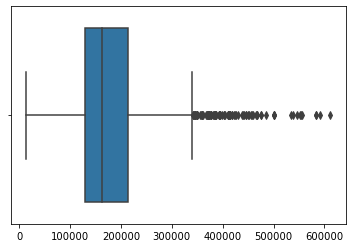

In [20]:
#plot boxplot
sns.boxplot(ames[['SalePrice']]);

In [21]:
ames[['SalePrice']].describe()

SalePrice
count    2051.000000
mean   181469.701609
std     79258.659352
min     12789.000000
25%    129825.000000
50%    162500.000000
75%    214000.000000
max    611657.000000

In [22]:
IQR = 214000 - 129825    #(Q75 - Q25)
LB = 129825 - 1.5*IQR #(Q25 - 1.5 x IQR)
UB = 214000 + 1.5*IQR
print('IQR is', IQR)
print('LB is', LB)
print('UB is', UB)

IQR is 84175
LB is 3562.5
UB is 340262.5


* The outliers seem to be properties with more than 340,000 SalePrice

In [23]:
ames[ames['SalePrice'] > 340000].shape

(94, 76)

* There are 76 properties with price range more than 340,000.

In [24]:
# drop outliers
ames.drop( ames[ames['SalePrice'] > 340000].index, inplace = True )

### Define dependent variable, y.

In [25]:
y = ames['SalePrice']

# Look at the relationship between SalePrice and each categorical variable.

### Compile list of categorical variables in ames.

In [26]:
# Check for categorical variables in ames and put in a list
ames_cat = [b for b in ames if ames[b].dtype == 'object' and b != 'SalePrice']
ames_cat 

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']

In [27]:
# create function to plot box plots
def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize = (15,140))
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(data = dataframe, x = column, y = y,  orient='v', ax= ax[i])


### Plot Box plots of SalePrice against list of categorical variables in ames.

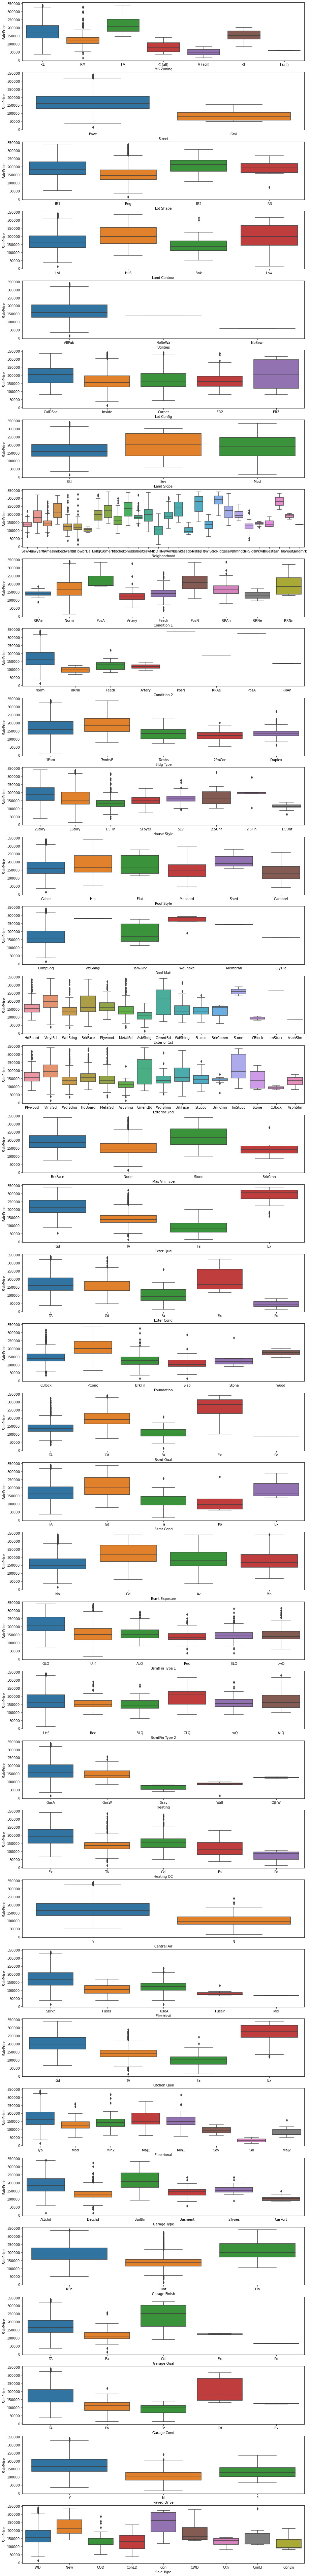

In [28]:
# plot box plots for list containing categorical variables
subplot_boxplot(ames, ames_cat)

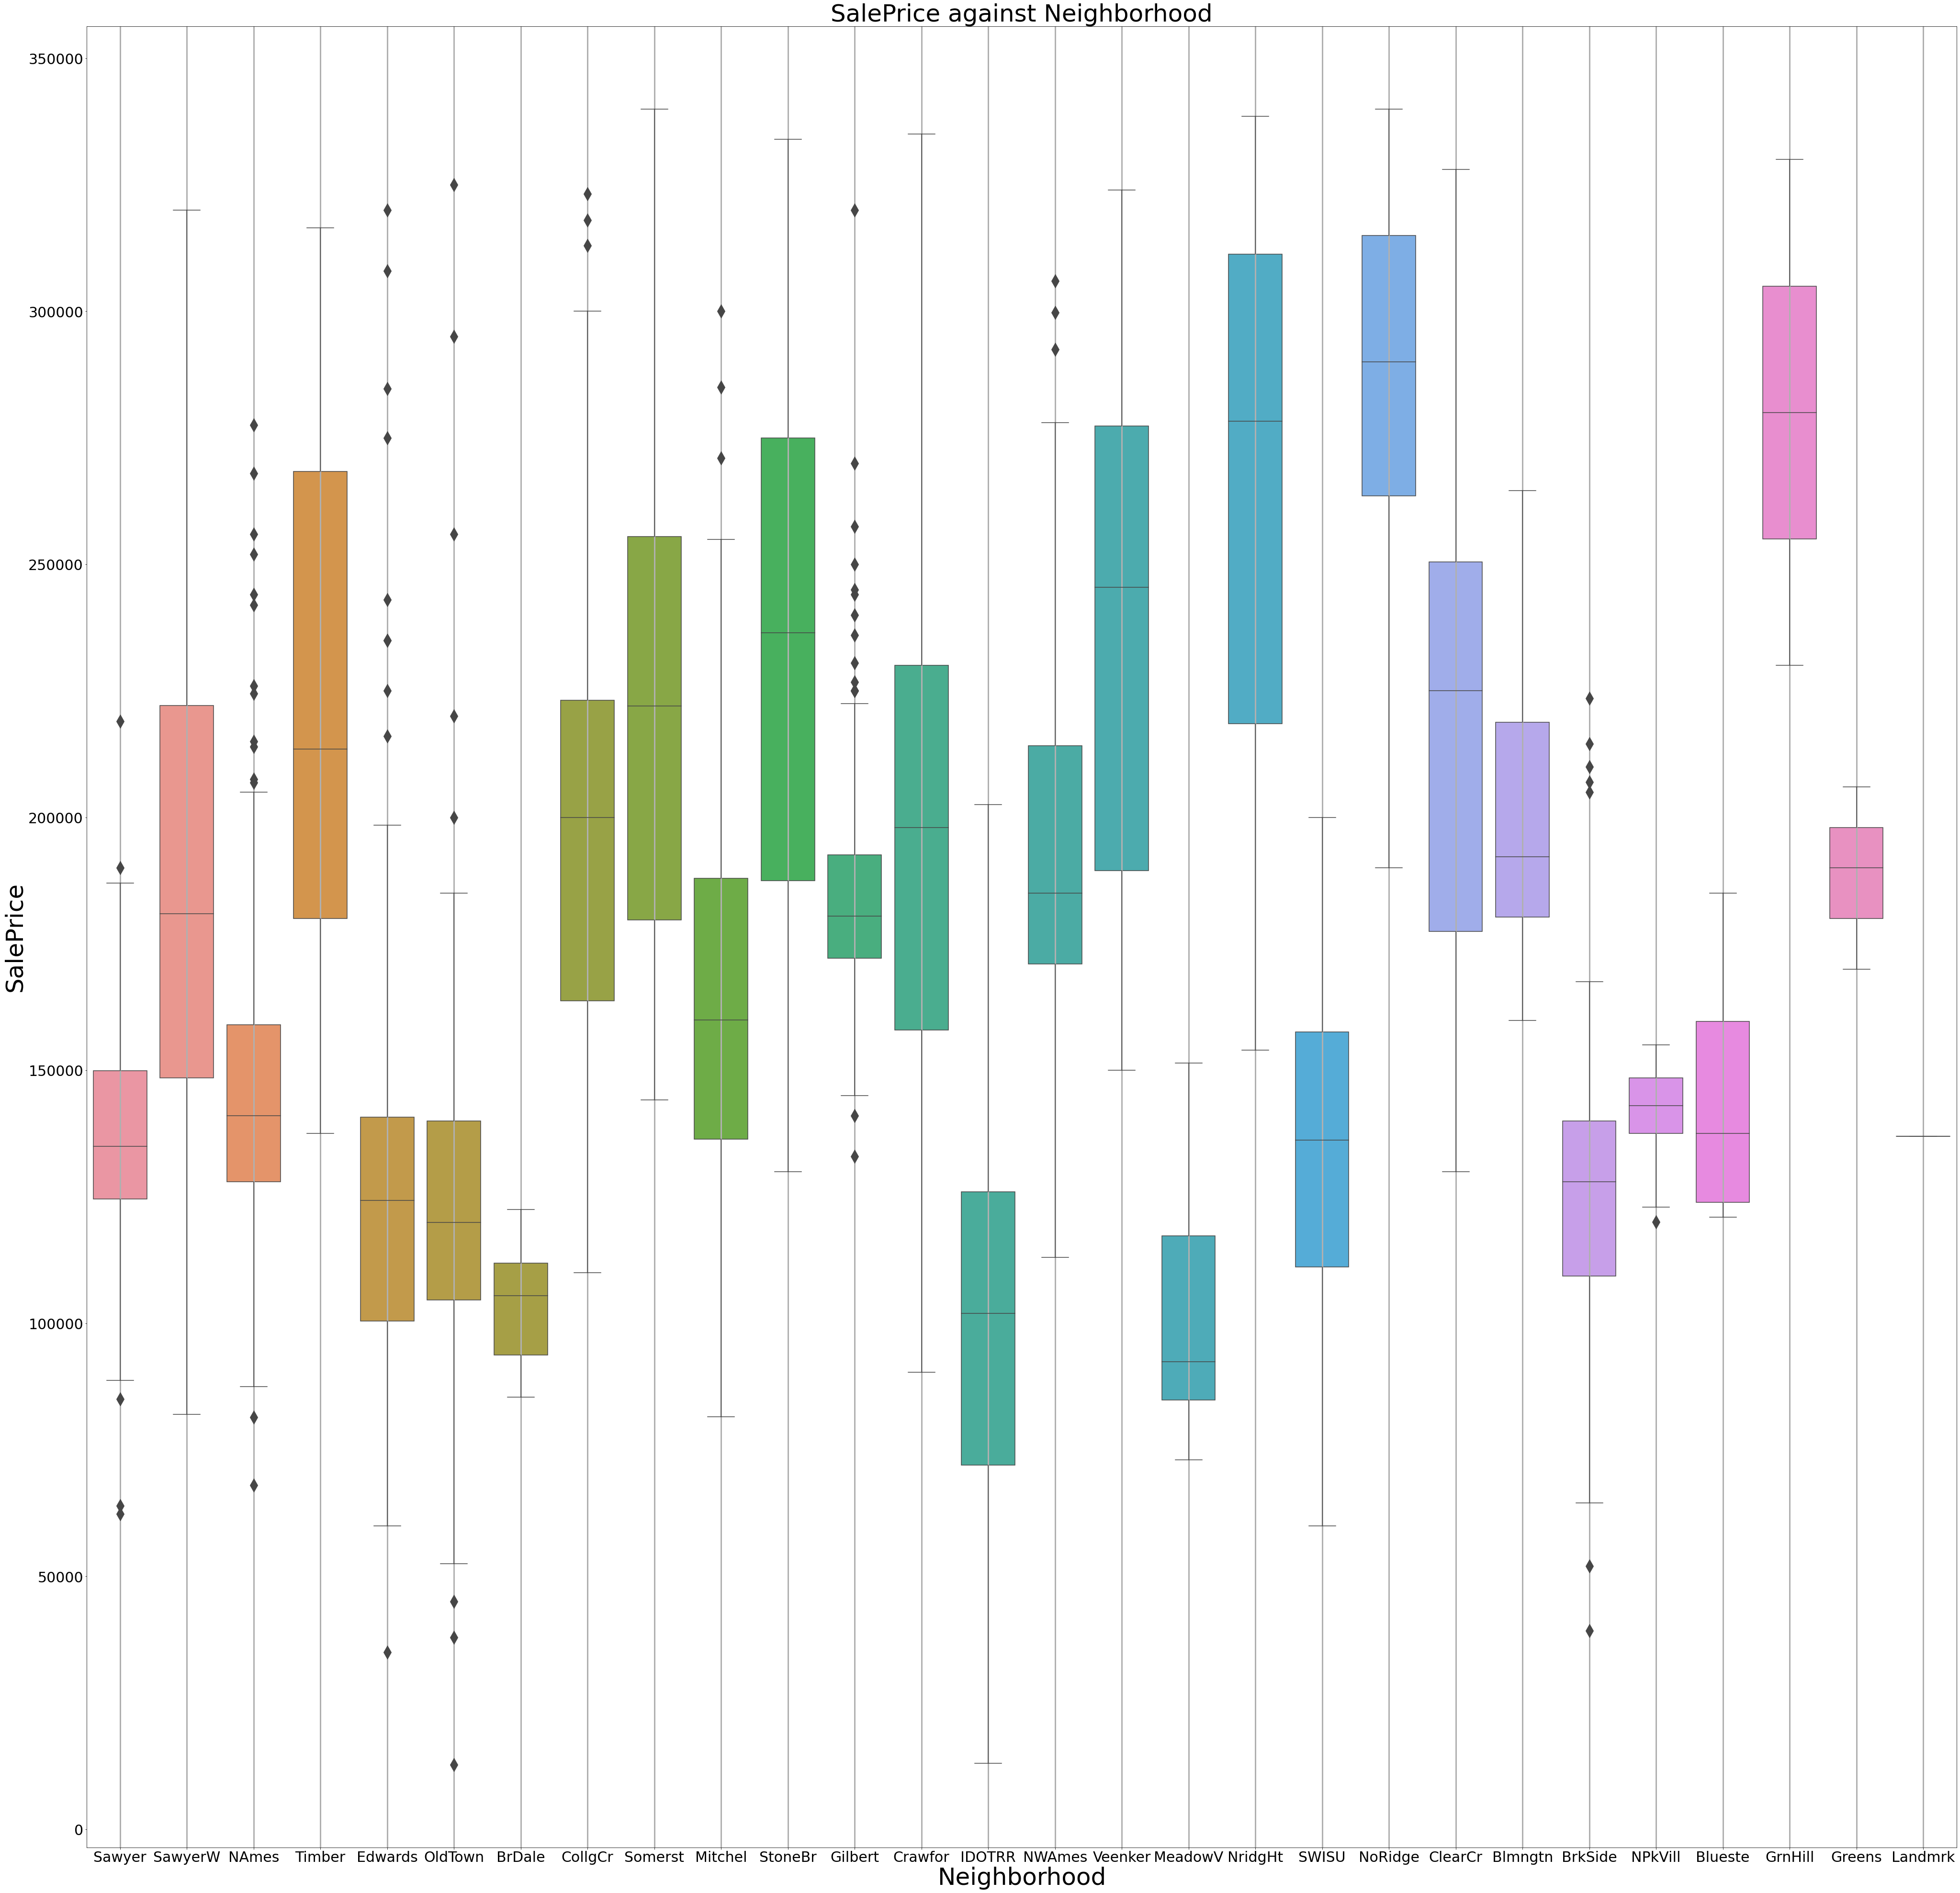

In [29]:
# replot SalePrice against Neighborhood
plt.figure(figsize = (70,70))
box = sns.boxplot(data = ames, x = 'Neighborhood', y = y, fliersize = 20.0)

box.axes.set_title('SalePrice against Neighborhood',fontsize=50)
box.set_xlabel("Neighborhood",fontsize=50)
box.set_ylabel("SalePrice",fontsize=50)
box.tick_params(labelsize = 30)
box.grid(axis = 'x', linewidth = '3')
plt.show()


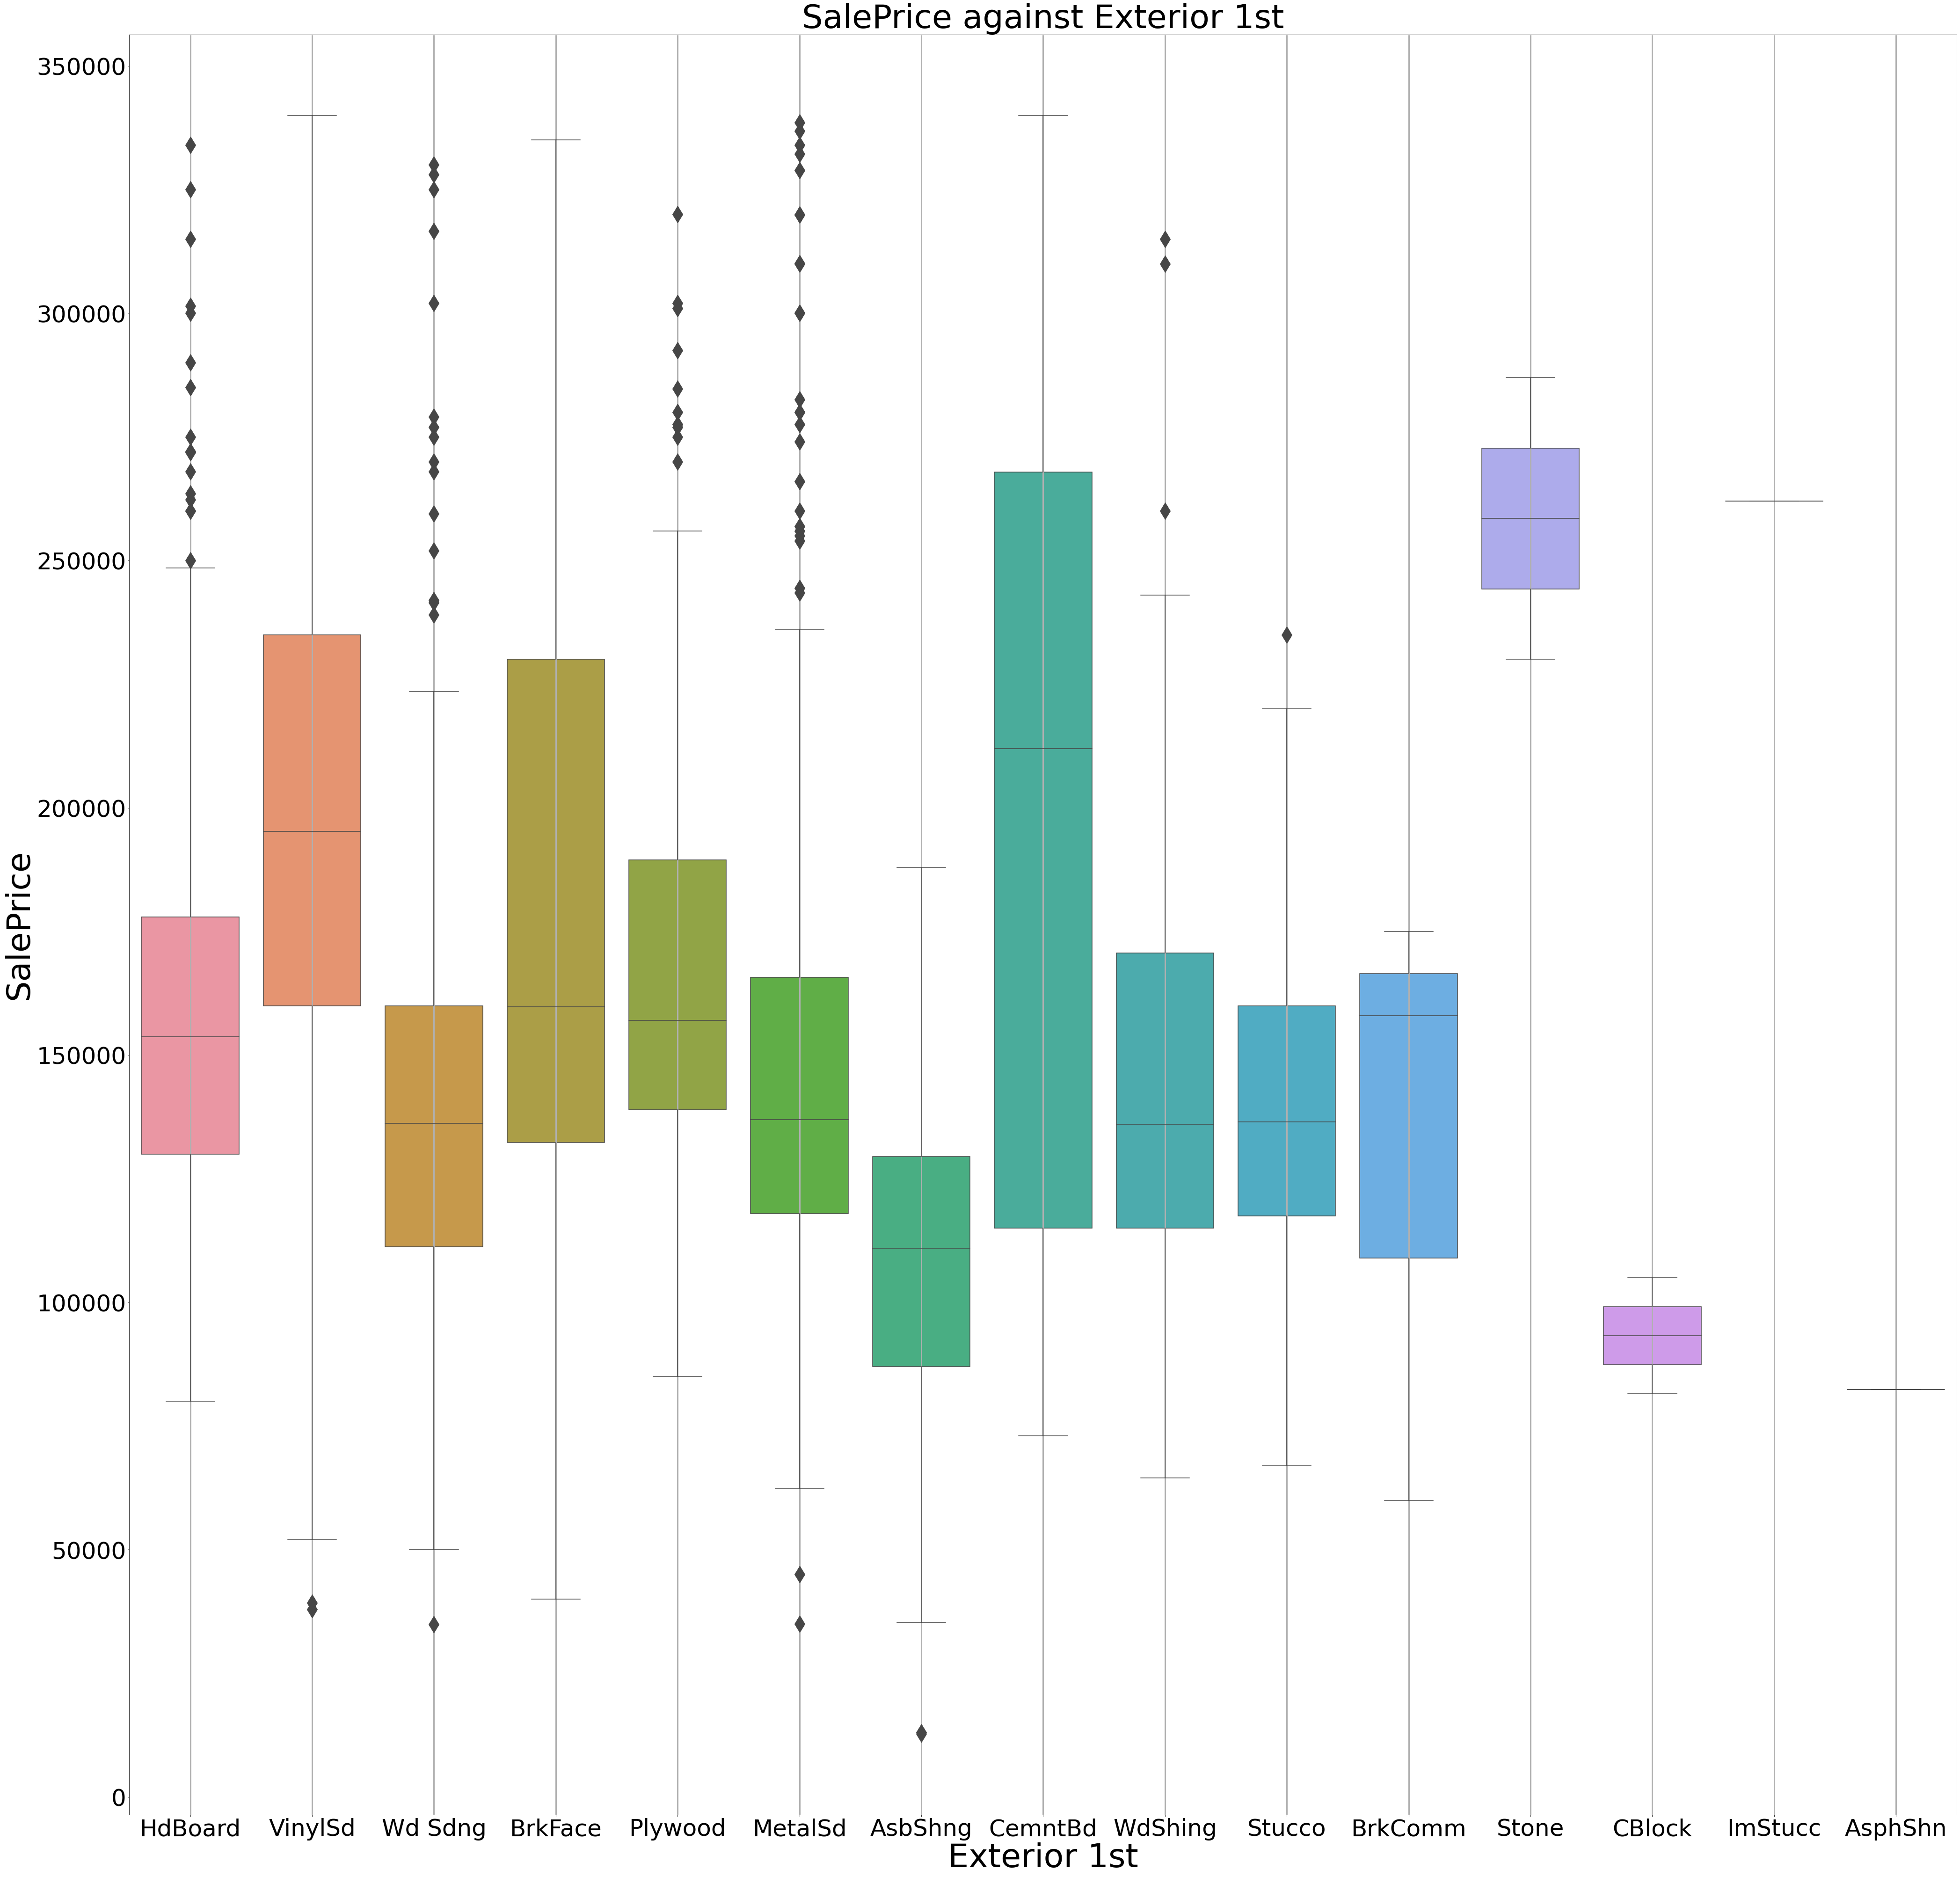

In [30]:
# replot SalePrice against Exterior 1st
plt.figure(figsize = (70,70))
box = sns.boxplot(data = ames, x = 'Exterior 1st', y = y, fliersize = 25.0)

box.axes.set_title('SalePrice against Exterior 1st',fontsize=70)
box.set_xlabel("Exterior 1st",fontsize=70)
box.set_ylabel("SalePrice",fontsize=70)
box.tick_params(labelsize=50)
box.grid(axis = 'x', linewidth = '3')
plt.show()

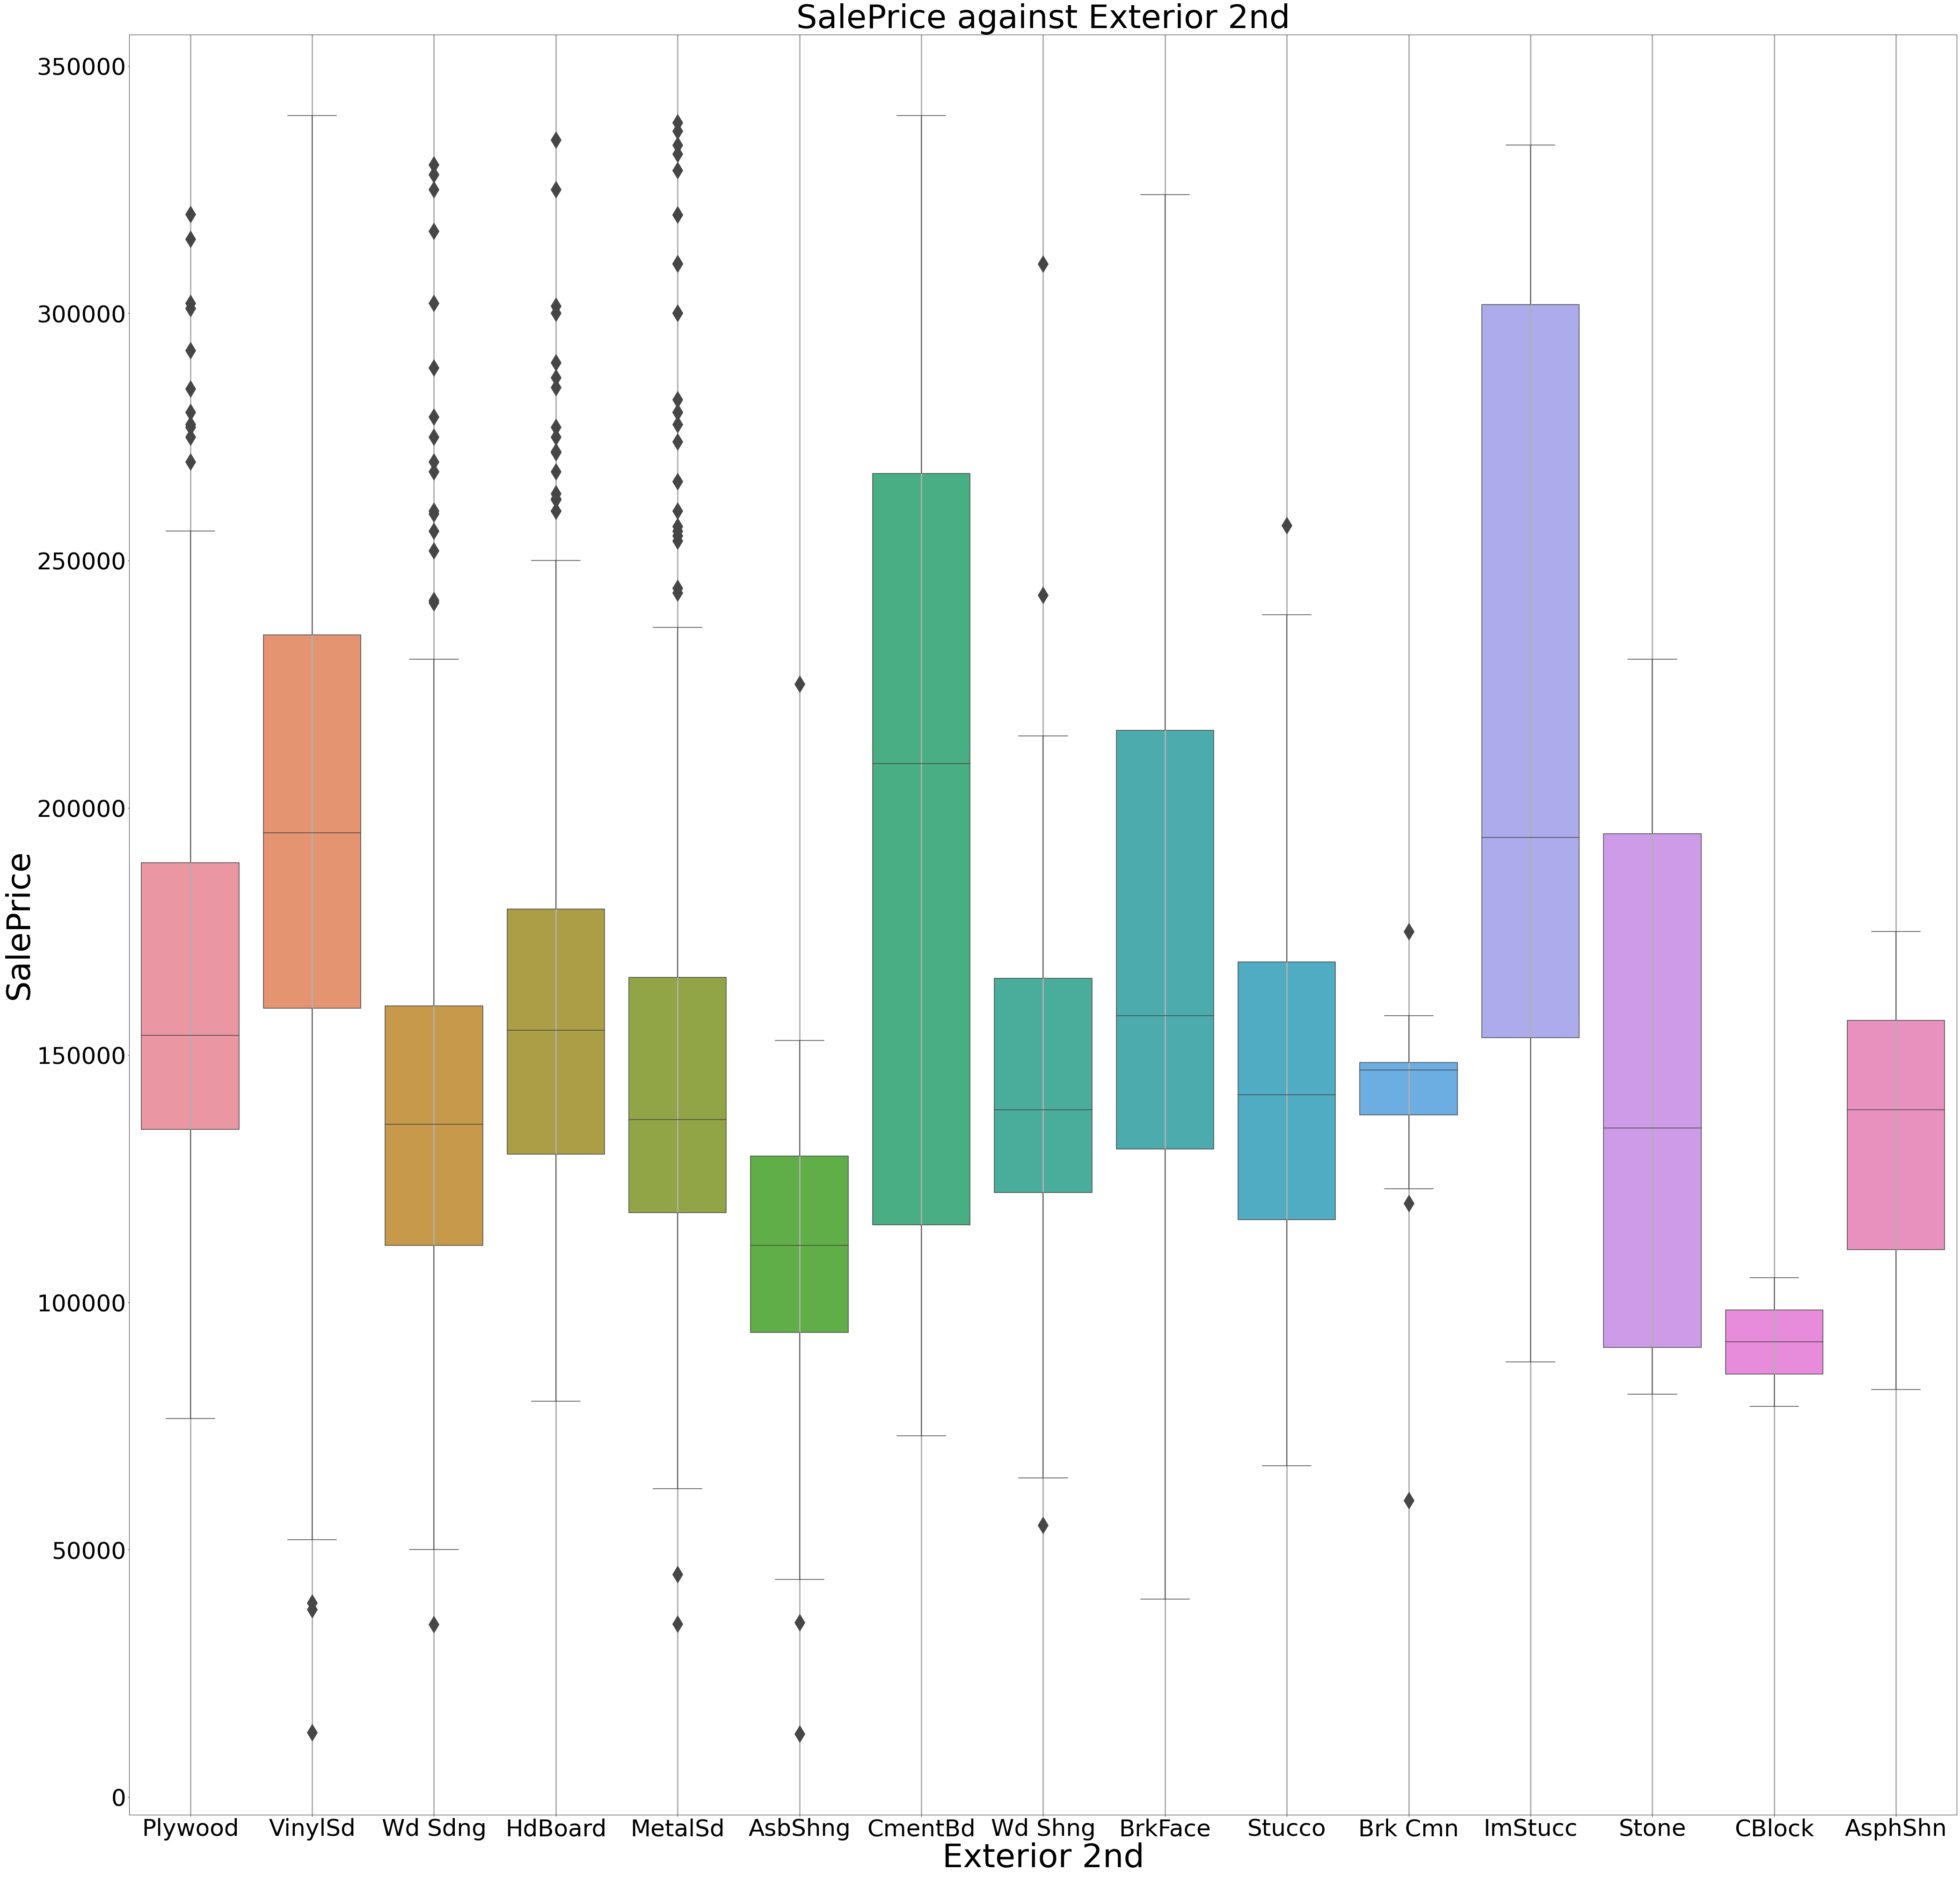

In [31]:
# replot SalePrice against Exterior 2nd
plt.figure(figsize = (70,70))
box = sns.boxplot(data = ames, x = 'Exterior 2nd', y = y, fliersize = 25.0)

box.axes.set_title('SalePrice against Exterior 2nd',fontsize=70)
box.set_xlabel("Exterior 2nd",fontsize=70)
box.set_ylabel("SalePrice",fontsize=70)
box.tick_params(labelsize=50)
box.grid(axis = 'x', linewidth = '3')
plt.show()

# Summary of findings from Boxplots

### Using the boxplot of SalePrice against Neighborhood as an example:

The median SalePrice of BrDale and IDOTRR is 10500 and 10200 respectively. The median SalePrice of StoneBr and NridgHt is 322450 and 317500 respectively. This shows that the neighborhood the property is built in has an effect on the SalePrice.

* Boxplots are evaluated based on the example above. If the categorical variable is deemed to have an effect on the SalePrice, the variables are selected and compiled in the list, ames_cat_select.

In [32]:
# showcase example mentioned in 1)
print('Median SalePrice of BrDale is', ames[(ames['Neighborhood'] == 'BrDale' )][['SalePrice','Neighborhood']].median())
print('Median SalePrice of IDOTRR is', ames[(ames['Neighborhood'] == 'IDOTRR' )][['SalePrice','Neighborhood']].median())
print('Median SalePrice of StoneBr is', ames[(ames['Neighborhood'] == 'StoneBr' )][['SalePrice','Neighborhood']].median())
print('Median SalePrice of NridgHt is', ames[(ames['Neighborhood'] == 'NridgHt' )][['SalePrice','Neighborhood']].median())


Median SalePrice of BrDale is SalePrice    105500.0
dtype: float64
Median SalePrice of IDOTRR is SalePrice    102000.0
dtype: float64
Median SalePrice of StoneBr is SalePrice    236500.0
dtype: float64
Median SalePrice of NridgHt is SalePrice    278250.0
dtype: float64


### The list of categorical variables are not selected. From their boxplots, these variables seem to have no effect on the SalePrice. 

* Lot Shape
* Land Contour
* Lot Config
* Land Slope
* Bldg Type
* House Style
* Roof Style
* Mas Vnr Type
* Bsmt Cond
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* Heating QC

### Drop categorical variables that are not selected from data.

In [33]:
# drop categorical variables that do not have effect on SalePrice based on boxplot evaluations.
# 'Id' and 'PID' columns will also be dropped since they are identity tags.
# drop SalePrice because it is the dependent variable

X = ames.drop( columns = ['Id','PID',
'Lot Shape',
'Land Contour',
'Lot Config',
'Land Slope',
'Bldg Type',
'House Style',
'Roof Style',
'Mas Vnr Type',
'Bsmt Cond',
'Bsmt Exposure',
'BsmtFin Type 1',
'BsmtFin Type 2',
'Heating QC',
'SalePrice'])

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2050
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      1957 non-null   int64  
 1   MS Zoning        1957 non-null   object 
 2   Lot Frontage     1629 non-null   float64
 3   Lot Area         1957 non-null   int64  
 4   Street           1957 non-null   object 
 5   Utilities        1957 non-null   object 
 6   Neighborhood     1957 non-null   object 
 7   Condition 1      1957 non-null   object 
 8   Condition 2      1957 non-null   object 
 9   Overall Qual     1957 non-null   int64  
 10  Overall Cond     1957 non-null   int64  
 11  Year Built       1957 non-null   int64  
 12  Year Remod/Add   1957 non-null   int64  
 13  Roof Matl        1957 non-null   object 
 14  Exterior 1st     1957 non-null   object 
 15  Exterior 2nd     1957 non-null   object 
 16  Mas Vnr Area     1937 non-null   float64
 17  Exter Qual    

In [35]:
lst_cat_drop = ['Id','PID',
'Lot Shape',
'Land Contour',
'Lot Config',
'Land Slope',
'Bldg Type',
'House Style',
'Roof Style',
'Mas Vnr Type',
'Bsmt Cond',
'Bsmt Exposure',
'BsmtFin Type 1',
'BsmtFin Type 2',
'Heating QC']

### Compiled list of potential categorical variables to build linear regression (lr) model based on boxplot evaluation.

In [36]:
ames_cat_select = [a for a in ames_cat if not a in lst_cat_drop]
ames_cat_select

['MS Zoning',
 'Street',
 'Utilities',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Heating',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']

### total no. of categorical variables in data.

In [37]:
len(ames_cat)

37

### total no. of categorical variables selected.

In [38]:
len(ames_cat_select)

24

* 24 / 37  : 65% of categorical variables selected

In [39]:
# check null values in categorical variables
X[['MS Zoning',
 'Street',
 'Utilities',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Heating',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']].isnull().sum()

MS Zoning          0
Street             0
Utilities          0
Neighborhood       0
Condition 1        0
Condition 2        0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         55
Heating            0
Central Air        0
Electrical         0
Kitchen Qual       0
Functional         0
Garage Type      113
Garage Finish    114
Garage Qual      114
Garage Cond      114
Paved Drive        0
Sale Type          0
dtype: int64

* The categorical variables will be converted into discrete variables later. The effect of the null values on the model will be evaluated.

* Columns for null values will be created later.

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2050
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      1957 non-null   int64  
 1   MS Zoning        1957 non-null   object 
 2   Lot Frontage     1629 non-null   float64
 3   Lot Area         1957 non-null   int64  
 4   Street           1957 non-null   object 
 5   Utilities        1957 non-null   object 
 6   Neighborhood     1957 non-null   object 
 7   Condition 1      1957 non-null   object 
 8   Condition 2      1957 non-null   object 
 9   Overall Qual     1957 non-null   int64  
 10  Overall Cond     1957 non-null   int64  
 11  Year Built       1957 non-null   int64  
 12  Year Remod/Add   1957 non-null   int64  
 13  Roof Matl        1957 non-null   object 
 14  Exterior 1st     1957 non-null   object 
 15  Exterior 2nd     1957 non-null   object 
 16  Mas Vnr Area     1937 non-null   float64
 17  Exter Qual    

# Look at the relationship between SalePrice and each numerical variable

### Compile list of numerical variables in X_final.

In [41]:
# Check for numerical variables in X and put in a list
numerical_lst = [b for b in X if (X[b].dtype == 'float64') or (X[b].dtype == 'int64')]
numerical_lst

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [42]:
# create SalePrice vs numerical variables dataframe
y_vs_numericals = ames[['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']]

### Plot regplots to evaluate the relationship between SalePrice and each numerical variable. 

In [43]:
# create function to plot regplots
def subplot_regplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,120))
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):
        sns.regplot(data = dataframe, x = column, y = y, scatter_kws={'s':3}, ax= ax[i], color = 'green')

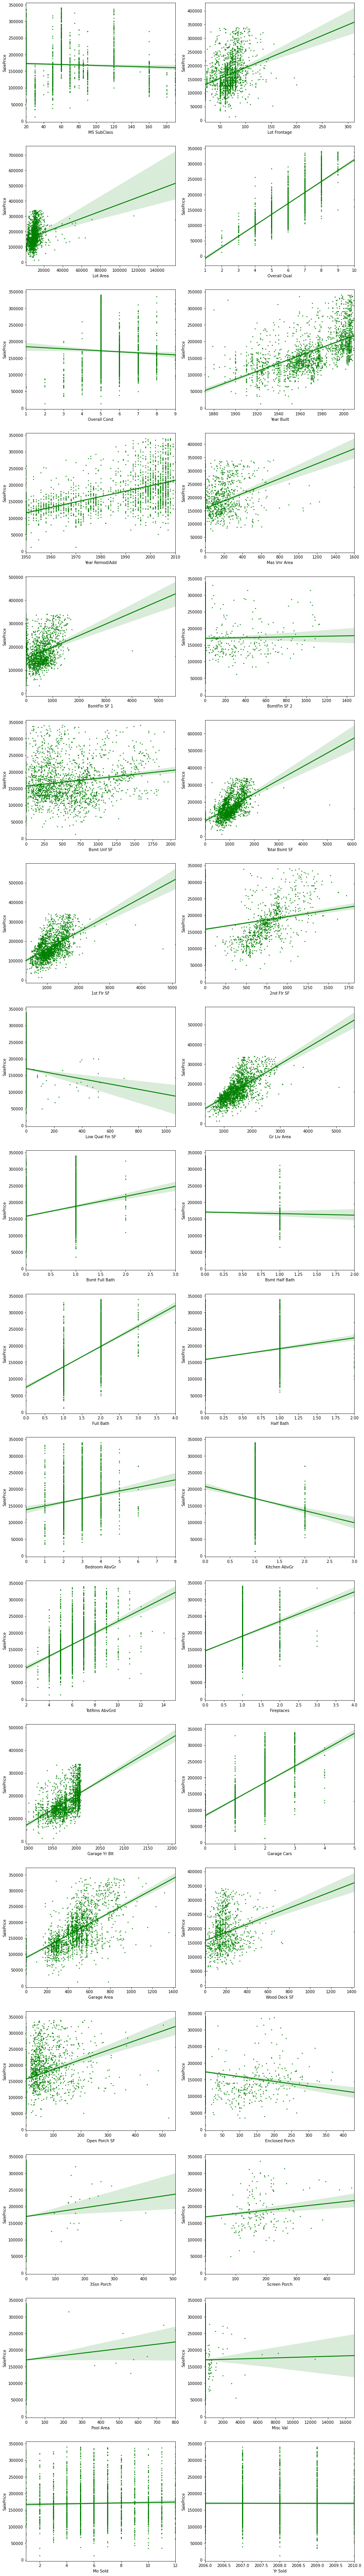

In [44]:
subplot_regplot(X, numerical_lst)

### From the regplots, the numerical variables seem to be linearly correlated with SalePrice.

# Use the Pearson's correlation coefficient to quantify and evaluate the correlation strength between SalePrice and each numerical variables in data.

In [45]:
# Calculate correlation coefficients of Saleprice vs numerical variables
corr_values = y_vs_numericals.corr()['SalePrice']

# Create list of numerical variables with correlation coefficients
corr = zip(y_vs_numericals.columns , corr_values)

# Create list of numerical variables with correlation coefficients
corr_y_num = {name: value for name,value in corr}

corr_lst = pd.DataFrame({'Correlation Coefficients': corr_y_num})
corr_lst.drop(['SalePrice'], inplace = True)
corr_lst

Correlation Coefficients
1st Flr SF                       0.535557
2nd Flr SF                       0.263247
3Ssn Porch                       0.054647
Bedroom AbvGr                    0.153227
Bsmt Full Bath                   0.259143
Bsmt Half Bath                  -0.020025
Bsmt Unf SF                      0.169680
BsmtFin SF 1                     0.354273
BsmtFin SF 2                     0.014976
Enclosed Porch                  -0.144906
Fireplaces                       0.470636
Full Bath                        0.555874
Garage Area                      0.609726
Garage Cars                      0.625719
Garage Yr Blt                    0.545975
Gr Liv Area                      0.652235
Half Bath                        0.271140
Kitchen AbvGr                   -0.130651
Lot Area                         0.254245
Lot Frontage                     0.296636
Low Qual Fin SF                 -0.066034
MS SubClass                     -0.053383
Mas Vnr Area                     0.356745
Misc Val                         0.007448
Mo Sold                          0.029922
Open Porch SF                    0.330544
Overall Cond                    -0.057425
Overall Qual                     0.785928
Pool Area                        0.043670
Screen Porch                     0.093845
TotRms AbvGrd                    0.435222
Total Bsmt SF                    0.550446
Wood Deck SF                     0.296840
Year Built                       0.600397
Year Remod/Add                   0.572956
Yr Sold                         -0.001998

* From the list above, the numerical variables have varying degrees of correlation with SalePrice. Numerical variables with Pearson correlation coefficients > 0.5 are considered to have high degree of correlation with SalePrice.

In [46]:
# Select for numerical variables with correlation coefficients > 0.5
corr_lst_select = corr_lst[corr_lst['Correlation Coefficients'] > 0.5]
corr_lst_select

Correlation Coefficients
1st Flr SF                      0.535557
Full Bath                       0.555874
Garage Area                     0.609726
Garage Cars                     0.625719
Garage Yr Blt                   0.545975
Gr Liv Area                     0.652235
Overall Qual                    0.785928
Total Bsmt SF                   0.550446
Year Built                      0.600397
Year Remod/Add                  0.572956

In [47]:
len(corr_lst_select)

10

* 10 numerical variables are found to have high degree of correlation with SalePrice based on correlation coefficient value.

In [48]:
numerical_col_selected = ['1st Flr SF',
'Full Bath',
'Garage Area',
'Garage Cars',
'Garage Yr Blt',
'Gr Liv Area',
'Overall Qual',
'Total Bsmt SF',
'Year Built',
'Year Remod/Add']

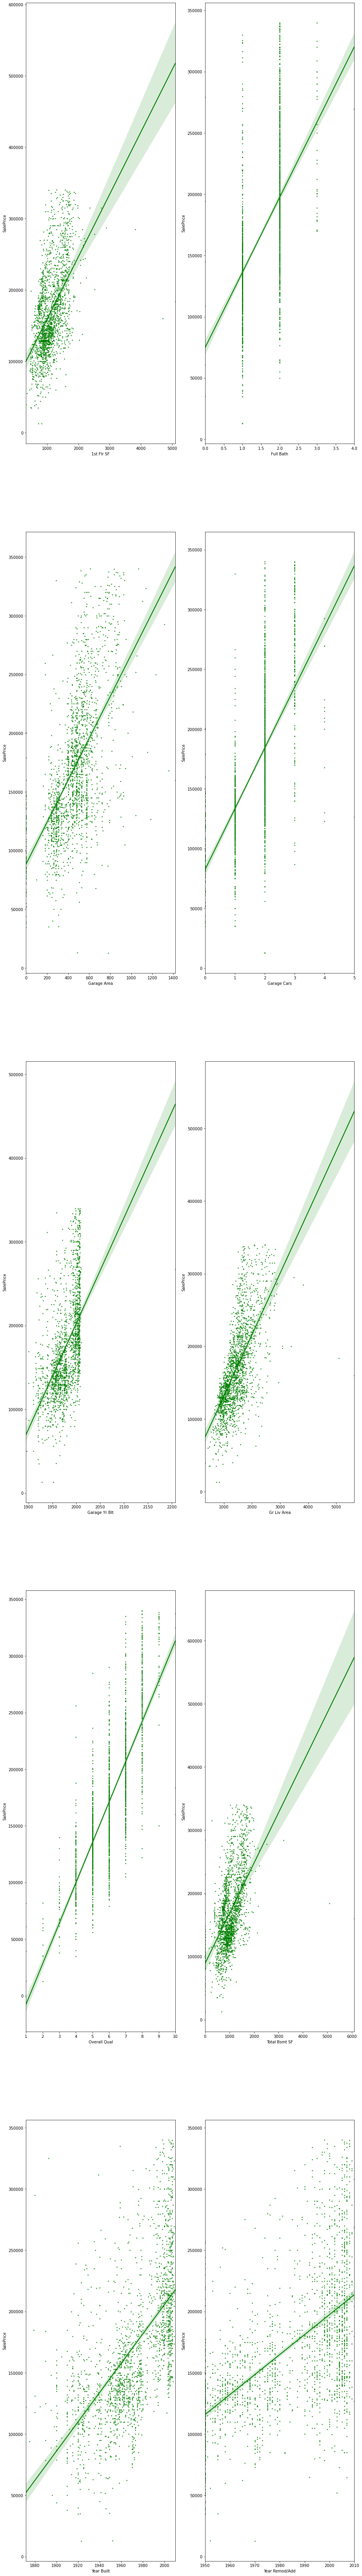

In [49]:
# replot the selected numerical variables to visualize the correlation with SalePrice

subplot_regplot(X, numerical_col_selected)

### Drop numerical features that do not have a high degree of linear correlation with SalePrice

In [50]:
# Select for numerical variables with correlation coefficients < 0.5
corr_lst_drop = corr_lst[corr_lst['Correlation Coefficients'] < 0.5]
corr_lst_drop

Correlation Coefficients
2nd Flr SF                       0.263247
3Ssn Porch                       0.054647
Bedroom AbvGr                    0.153227
Bsmt Full Bath                   0.259143
Bsmt Half Bath                  -0.020025
Bsmt Unf SF                      0.169680
BsmtFin SF 1                     0.354273
BsmtFin SF 2                     0.014976
Enclosed Porch                  -0.144906
Fireplaces                       0.470636
Half Bath                        0.271140
Kitchen AbvGr                   -0.130651
Lot Area                         0.254245
Lot Frontage                     0.296636
Low Qual Fin SF                 -0.066034
MS SubClass                     -0.053383
Mas Vnr Area                     0.356745
Misc Val                         0.007448
Mo Sold                          0.029922
Open Porch SF                    0.330544
Overall Cond                    -0.057425
Pool Area                        0.043670
Screen Porch                     0.093845
TotRms AbvGrd                    0.435222
Wood Deck SF                     0.296840
Yr Sold                         -0.001998

* Full Bath and Garage Yr Blt will also be dropped. After looking at the regression plot again, it is unlikely they have linear correlation with SalePrice.

In [51]:
X.drop(columns = ['2nd Flr SF',
'3Ssn Porch',
'Bedroom AbvGr',
'Bsmt Full Bath',
'Bsmt Half Bath',
'Bsmt Unf SF',
'BsmtFin SF 1',
'BsmtFin SF 2',
'Enclosed Porch',
'Fireplaces',
'Half Bath',
'Kitchen AbvGr',
'Lot Area',
'Lot Frontage',
'Low Qual Fin SF',
'MS SubClass',
'Misc Val',
'Mo Sold',
'Open Porch SF',
'Overall Cond',
'Pool Area',
'Screen Porch',
'Wood Deck SF',
'Yr Sold',
'Full Bath',    
'Garage Yr Blt'], inplace = True)

In [52]:
lst_num_drop = ['2nd Flr SF',
'3Ssn Porch',
'Bedroom AbvGr',
'Bsmt Full Bath',
'Bsmt Half Bath',
'Bsmt Unf SF',
'BsmtFin SF 1',
'BsmtFin SF 2',
'Enclosed Porch',
'Fireplaces',
'Half Bath',
'Kitchen AbvGr',
'Lot Area',
'Lot Frontage',
'Low Qual Fin SF',
'MS SubClass',
'Misc Val',
'Mo Sold',
'Open Porch SF',
'Overall Cond',
'Pool Area',
'Screen Porch',
'Wood Deck SF',
'Yr Sold',
'Full Bath',    
'Garage Yr Blt']

### Check if the current numerical variables are correlated to one another using Pearson's correlation coefficient.

In [53]:
# List of current numerical variables
numerical_now = [a for a in numerical_lst if a in X ]
numerical_now

['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'TotRms AbvGrd',
 'Garage Cars',
 'Garage Area']

In [54]:
# create dataframe to evaluate correlation between current numerical variables
numericals = X[['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'TotRms AbvGrd',
 'Garage Cars',
 'Garage Area']]

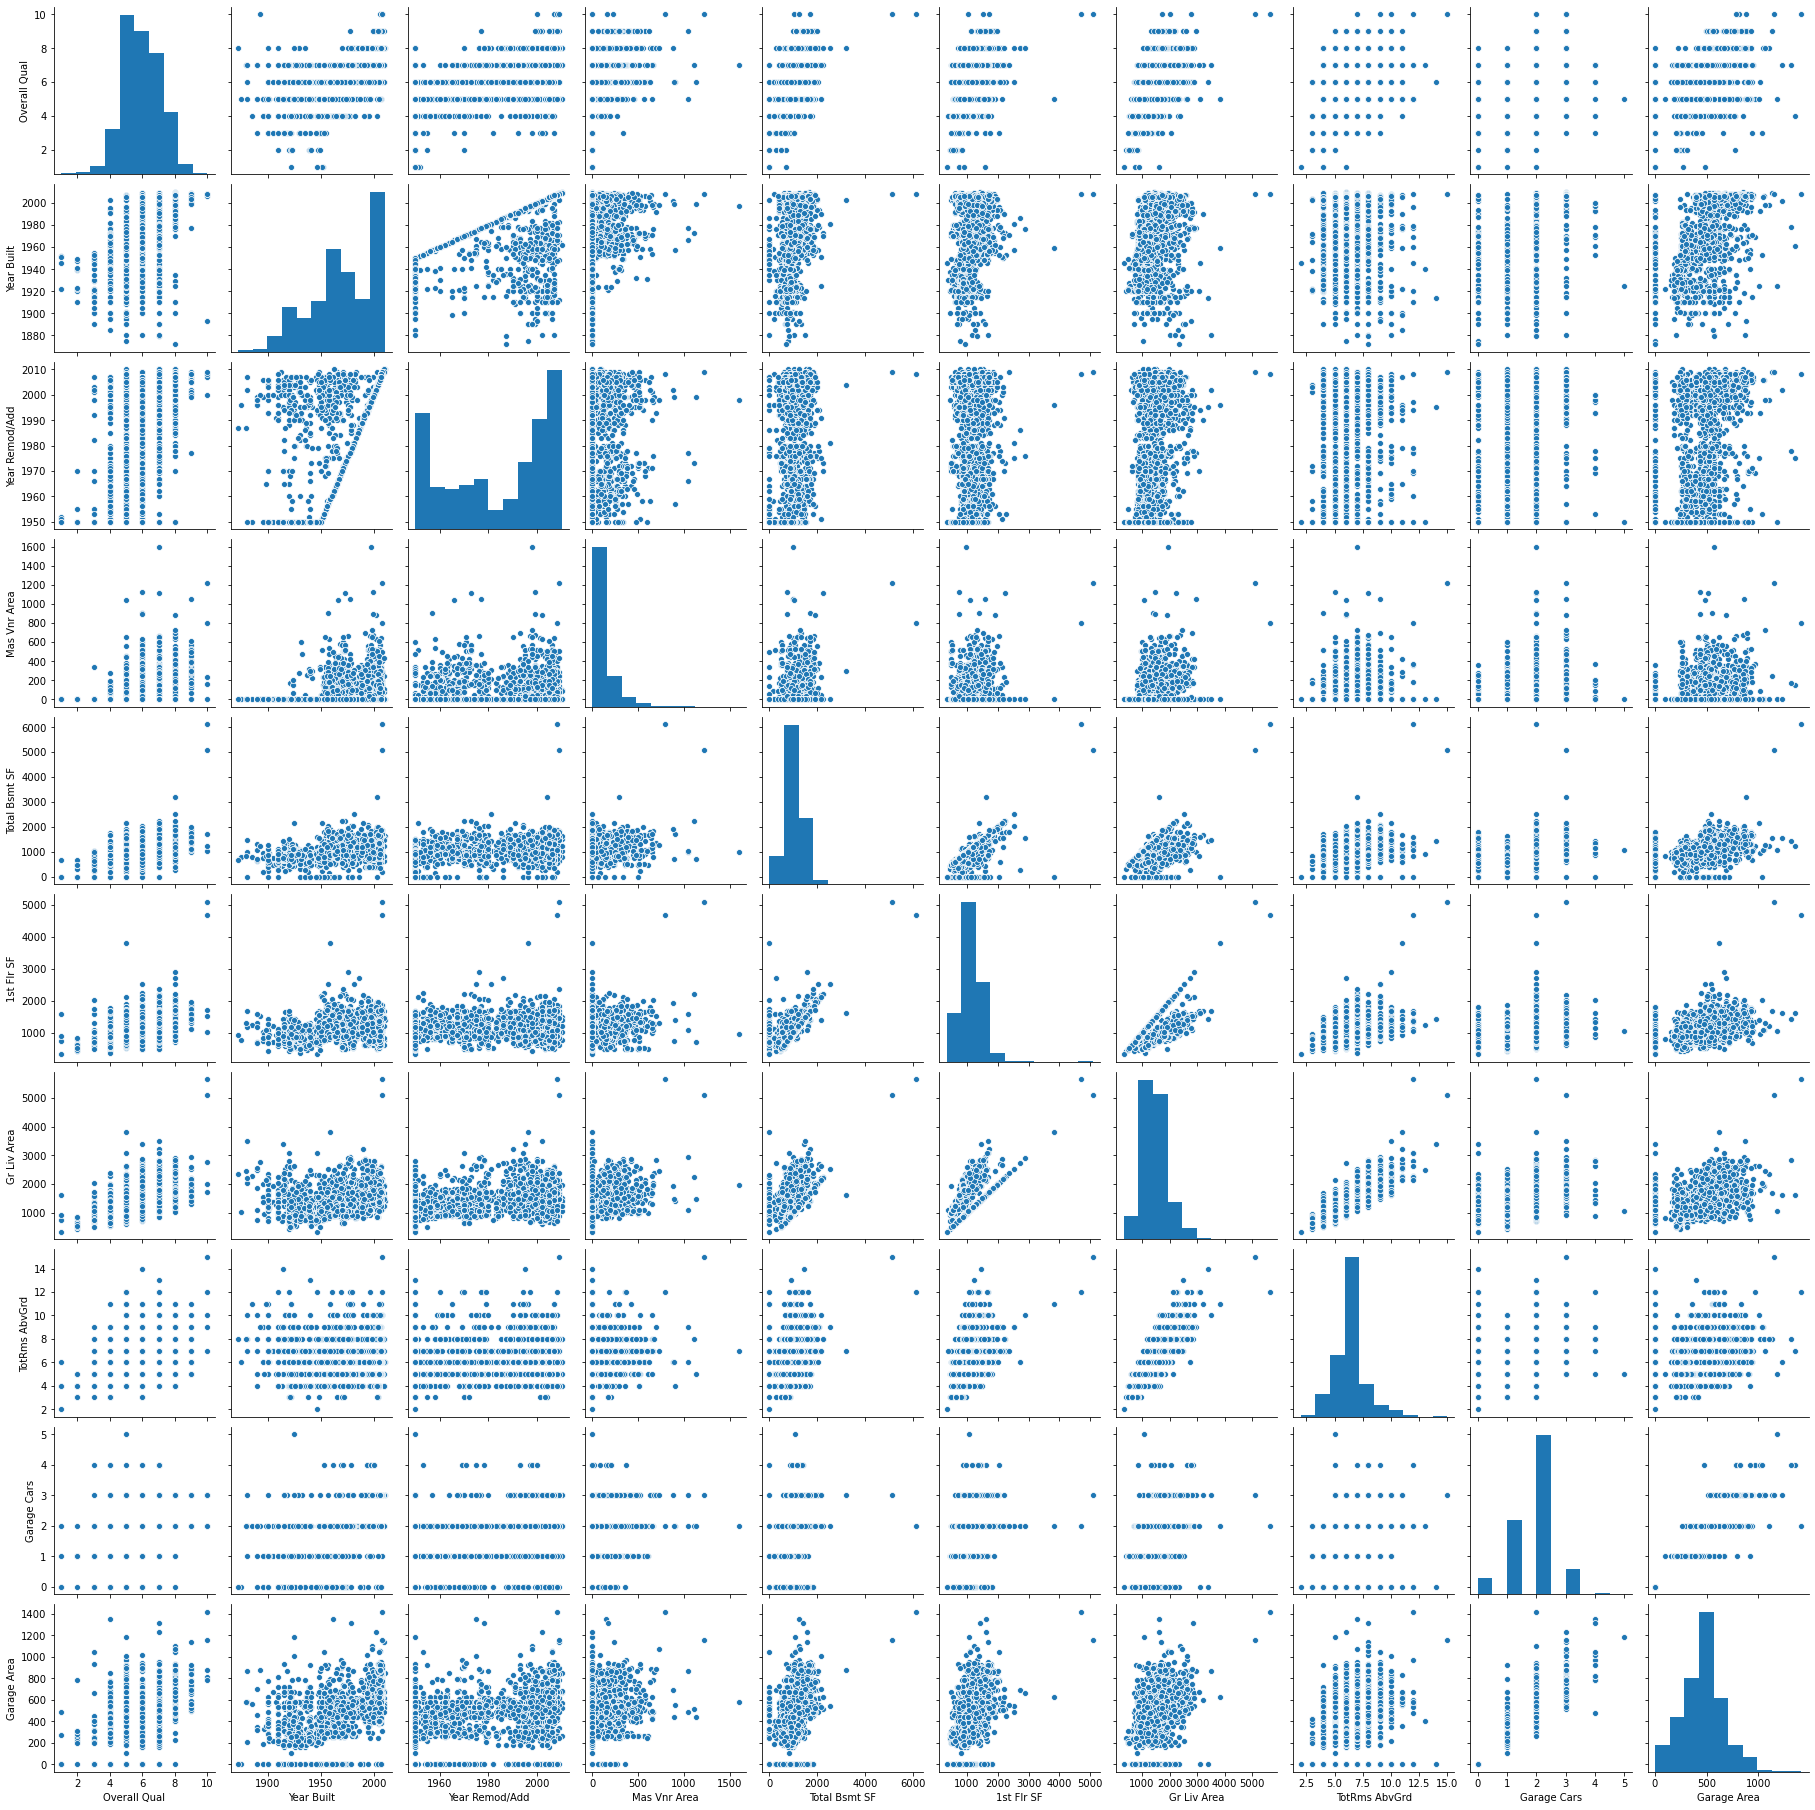

In [55]:
sns.pairplot(numericals);
sns.set_context("paper", rc={"axes.labelsize":13})

### There seem to have a linear correlation between the numerical variables from the pairplot above:

* Overall Qual is likely to have a linear correlation with Gr Liv Area, 1st Flr SF, Total Bsmt SF.
* Year Built seem to have no linear correlation with other variables.
* Year Remod/Add Built seem to have no linear correlation with other variables.
* Mas Vnr Area seem to have no linear correlation with other variables.
* Total Bsmt SF is likely to have a linear correlation with Gr Liv Area, 1st Flr SF.
* 1st Flr SF is likely to have a linear correlation with Gr Liv Area, Total Bsmt SF.
* Gr Liv Area is likely to have a linear correlation with TotRms AbvGrd, 1st Flr SF, Total Bsmt SF.
* TotRms AbvGrd is likely to have a linear correlation with Gr Liv Area.
* Garage Cars is likely to have a linear correlation with Garage Area.
* Garage Area is likely to have a linear correlation with Garage Cars.

* In summary, Overall Qual, Gr Liv Area, Garage Area will be the selected variables out of these numerical variables. The rest of the variables will be dropped. The 3 selected variables seem to be sufficient to represent the effect of the rest of the variables have on the SalePrice. If all the variables are included, it will have the colinearity effect on the model, hence they should be excluded.

In [56]:
# drop numerical variables that are deem co-linear
X.drop(columns = [
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'TotRms AbvGrd',
 'Garage Cars'], inplace = True)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 2050
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MS Zoning      1957 non-null   object 
 1   Street         1957 non-null   object 
 2   Utilities      1957 non-null   object 
 3   Neighborhood   1957 non-null   object 
 4   Condition 1    1957 non-null   object 
 5   Condition 2    1957 non-null   object 
 6   Overall Qual   1957 non-null   int64  
 7   Roof Matl      1957 non-null   object 
 8   Exterior 1st   1957 non-null   object 
 9   Exterior 2nd   1957 non-null   object 
 10  Exter Qual     1957 non-null   object 
 11  Exter Cond     1957 non-null   object 
 12  Foundation     1957 non-null   object 
 13  Bsmt Qual      1902 non-null   object 
 14  Heating        1957 non-null   object 
 15  Central Air    1957 non-null   object 
 16  Electrical     1957 non-null   object 
 17  Gr Liv Area    1957 non-null   int64  
 18  Kitchen 

### Replacing null values in numerical variables with 0.
* For the garage year built, if it is null, it is assmued that the garage is not built at the same time the house was built.

In [58]:
# List of final numerical variables
numerical_final = [a for a in numerical_lst if a in X ]
numerical_final

['Overall Qual', 'Gr Liv Area', 'Garage Area']

In [59]:
# Check the number of null values in numerical variables
X[['Overall Qual', 'Gr Liv Area', 'Garage Area']].isnull().sum()

Overall Qual    0
Gr Liv Area     0
Garage Area     1
dtype: int64

In [60]:
# replace Nan values in numerical columns with 0
X['Garage Area'] = X['Garage Area'].replace(np.nan, 0)

In [61]:
# Check replacement of Nans with 0
X[['Overall Qual', 'Gr Liv Area', 'Garage Area']].isnull().sum()

Overall Qual    0
Gr Liv Area     0
Garage Area     0
dtype: int64

### Data is finalized to use it to do initial fitting and training in Ordinary Least Square model to select for variables.
* Categorical variables that have ordinal nature are disregarded.

In [62]:
X.head()

MS Zoning Street Utilities Neighborhood Condition 1 Condition 2  \
0        RL   Pave    AllPub       Sawyer        RRAe        Norm   
1        RL   Pave    AllPub      SawyerW        Norm        Norm   
2        RL   Pave    AllPub        NAmes        Norm        Norm   
3        RL   Pave    AllPub       Timber        Norm        Norm   
4        RL   Pave    AllPub      SawyerW        Norm        Norm   

   Overall Qual Roof Matl Exterior 1st Exterior 2nd  ... Gr Liv Area  \
0             6   CompShg      HdBoard      Plywood  ...        1479   
1             7   CompShg      VinylSd      VinylSd  ...        2122   
2             5   CompShg      VinylSd      VinylSd  ...        1057   
3             5   CompShg      VinylSd      VinylSd  ...        1444   
4             6   CompShg      Wd Sdng      Plywood  ...        1445   

  Kitchen Qual Functional Garage Type Garage Finish Garage Area Garage Qual  \
0           Gd        Typ      Attchd           RFn       475.0          TA   
1           Gd        Typ      Attchd           RFn       559.0          TA   
2           Gd        Typ      Detchd           Unf       246.0          TA   
3           TA        Typ     BuiltIn           Fin       400.0          TA   
4           TA        Typ      Detchd           Unf       484.0          TA   

   Garage Cond Paved Drive Sale Type  
0           TA           Y       WD   
1           TA           Y       WD   
2           TA           Y       WD   
3           TA           Y       WD   
4           TA           N       WD   

[5 rows x 27 columns]

### Transform categorical variables in X into discrete variables
* One of the columns is dropped for each categorical variable that is dummified to avoid the dummy variable trap in regression model.
* The Dummy Variable trap is a scenario in which the independent variables are multicollinear - one variable can be predicted from the others.

https://www.algosome.com/articles/dummy-variable-trap-regression.html

In [63]:
X = pd.get_dummies(X, drop_first = True, dummy_na = True)
X

Overall Qual  Gr Liv Area  Garage Area  MS Zoning_C (all)  MS Zoning_FV  \
0                6         1479        475.0                  0             0   
1                7         2122        559.0                  0             0   
2                5         1057        246.0                  0             0   
3                5         1444        400.0                  0             0   
4                6         1445        484.0                  0             0   
...            ...          ...          ...                ...           ...   
2046             8         1728        520.0                  0             0   
2047             4          861        539.0                  0             0   
2048             6         1913        342.0                  0             0   
2049             4         1200        294.0                  0             0   
2050             7         1804        442.0                  0             0   

      MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  \
0                     0             0             1             0   
1                     0             0             1             0   
2                     0             0             1             0   
3                     0             0             1             0   
4                     0             0             1             0   
...                 ...           ...           ...           ...   
2046                  0             0             1             0   
2047                  0             0             1             0   
2048                  0             0             1             0   
2049                  0             0             1             0   
2050                  0             0             1             0   

      MS Zoning_nan  ...  Paved Drive_nan  Sale Type_CWD  Sale Type_Con  \
0                 0  ...                0              0              0   
1                 0  ...                0              0              0   
2                 0  ...                0              0              0   
3                 0  ...                0              0              0   
4                 0  ...                0              0              0   
...             ...  ...              ...            ...            ...   
2046              0  ...                0              0              0   
2047              0  ...                0              0              0   
2048              0  ...                0              0              0   
2049              0  ...                0              0              0   
2050              0  ...                0              0              0   

      Sale Type_ConLD  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   
...               ...              ...              ...            ...   
2046                0                0                0              0   
2047                0                0                0              0   
2048                0                0                0              0   
2049                0                0                0              0   
2050                0                0                0              0   

      Sale Type_Oth  Sale Type_WD   Sale Type_nan  
0                 0              1              0  
1                 0              1              0  
2                 0              1              0  
3                 0              1              0  
4                 0              1              0  
...             ...            ...            ...  
2046              0              1              0 

### X_final is the final data. Final data is checked for negative values. It is done at this step because before transforming categorical variables into discrete variables the entries for categorical variables are in string. It will result in traceback.

In [64]:
# check cells with negative values

count = 0
for n in X.values.flatten():
    if n < 0:
        count += 1
        
count

0

In [65]:
X_final = X
X_final

Overall Qual  Gr Liv Area  Garage Area  MS Zoning_C (all)  MS Zoning_FV  \
0                6         1479        475.0                  0             0   
1                7         2122        559.0                  0             0   
2                5         1057        246.0                  0             0   
3                5         1444        400.0                  0             0   
4                6         1445        484.0                  0             0   
...            ...          ...          ...                ...           ...   
2046             8         1728        520.0                  0             0   
2047             4          861        539.0                  0             0   
2048             6         1913        342.0                  0             0   
2049             4         1200        294.0                  0             0   
2050             7         1804        442.0                  0             0   

      MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  \
0                     0             0             1             0   
1                     0             0             1             0   
2                     0             0             1             0   
3                     0             0             1             0   
4                     0             0             1             0   
...                 ...           ...           ...           ...   
2046                  0             0             1             0   
2047                  0             0             1             0   
2048                  0             0             1             0   
2049                  0             0             1             0   
2050                  0             0             1             0   

      MS Zoning_nan  ...  Paved Drive_nan  Sale Type_CWD  Sale Type_Con  \
0                 0  ...                0              0              0   
1                 0  ...                0              0              0   
2                 0  ...                0              0              0   
3                 0  ...                0              0              0   
4                 0  ...                0              0              0   
...             ...  ...              ...            ...            ...   
2046              0  ...                0              0              0   
2047              0  ...                0              0              0   
2048              0  ...                0              0              0   
2049              0  ...                0              0              0   
2050              0  ...                0              0              0   

      Sale Type_ConLD  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
0                   0                0                0              0   
1                   0                0                0              0   
2                   0                0                0              0   
3                   0                0                0              0   
4                   0                0                0              0   
...               ...              ...              ...            ...   
2046                0                0                0              0   
2047                0                0                0              0   
2048                0                0                0              0   
2049                0                0                0              0   
2050                0                0                0              0   

      Sale Type_Oth  Sale Type_WD   Sale Type_nan  
0                 0              1              0  
1                 0              1              0  
2                 0              1              0  
3                 0              1              0  
4                 0              1              0  
...             ...            ...            ...  
2046              0              1              0 

# <span style = 'color:green'> Summary of Exploratory Data Analysis (EDA) <span>
1) Box plots of SalePrice against list of categorical variables in ames are plotted. The list of categorical variables that are evaluated to have an effect on SalePrice are short listed in ames_cat_select.
    
2) The relationship between SalePrice and each numerical variable is evaluated. 
* From the regplots, the numerical variables seem to be linearly correlated with SalePrice. 
* After that Pearson's correlation coefficient was used to evaluate the correlatoin strength of the numerical variables with SalePrice.
* 10 numerical variables are found to have high degree of correlation with SalePrice; their correlation coefficient value is > 0.5 
* Following that, 'Full Bath' and 'Garage Yr Blt' were dropped after evaluating the regplots, they do not have linear correlation with SalePrice.
    
3) The relationship between each numerical variable is checked with pairplot. 'Overall Qual', 'Gr Liv Area', 'Garage Area' are selected as the final numerical variables to build a linear regression model.

### Use train_test_split to split data, train = 80%, validate = 20%
### Validate will be used for validation. This will be treated as the unseen data to test the model.

In [66]:
X_train, X_validate, y_train, y_validate =  train_test_split(X_final, y, random_state = 42, train_size = 0.8, test_size = 0.2 )

In [67]:
print(X_train.shape, y_train.shape, X_validate.shape, y_validate.shape)

(1565, 171) (1565,) (392, 171) (392,)


### Fit the training data, X_train_model and y_train_model into Ordinary Least Square (OLS) model to build an estimated linear regression model to select features. 
* This OLS model from statsmodel is used as a simulated model. All the variables in the data will be used in this simulated model to select potential features that could have an effect on the dependent variable, SalePrice. 
* Statsmodel is used because it comes with test of significance, which helps to evaluate if the effect of the feature on the SalePrice is statistically significant or not.
* dummy_na columns are used to build the estimated model to evaluate the effect of null values on the model.

### Constant is added, hence the linear regression model is built with y-intercept, B$_{0}$. 
### * It does not make sense for the price to have a base value when all the features are equals to 0, where y = B$_{0}$
### * The purpose of the y-intercept is to give the model a better fit so that it better explains the relationship between the features and the dependent variable, SalePrice.

* The intercept helps to absorb the residuals in the linear regression model. It does so by giving the model a better fit which improves the accuracy of the model. An accurate model helps to explain the relationship between the dependent variable and its features better.

In [68]:
# Fit into Ordinary Least Square model to select features.

model = sm.OLS(y_train, X_train, hasconst = True).fit()

In [69]:
# summary of model
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     76.84
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:47:18   Log-Likelihood:                -17748.
No. Observations:                1565   AIC:                         3.578e+04
Df Residuals:                    1422   BIC:                         3.655e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Overall Qual          9349.7834    813.979     11.487      0.000    7753.054    1.09e+04
Gr Liv Area             43.9043      1.784     24.604      0.000      40.404      47.405
Garage Area             47.4972      4.547     10.446      0.000      38.578      56.417
MS Zoning_C (all)    -6.409e+04   4.33e+04     -1.481      0.139   -1.49e+05    2.08e+04
MS Zoning_FV         -4.738e+04   4.27e+04     -1.110      0.267   -1.31e+05    3.64e+04
MS Zoning_I (all)    -1.192e+04   2.42e+04     -0.493      0.622   -5.93e+04    3.55e+04
MS Zoning_RH         -4.689e+04   4.33e+04     -1.082      0.279   -1.32e+05    3.81e+04
MS Zoning_RL         -3.673e+04   4.23e+04     -0.868      0.386    -1.2e+05    4.63e+04
MS Zoning_RM         -4.811e+04   4.27e+04     -1.126      0.261   -1.32e+05    3.57e+04
MS Zoning_nan          7.35e-09    1.1e-08      0.669      0.503   -1.42e-08    2.89e-08
Street_Pave           8552.0461   1.12e+04      0.764      0.445   -1.34e+04    3.05e+04
Street_nan            8.342e-10   9.21e-10      0.906      0.365   -9.72e-10    2.64e-09
Utilities_NoSeWa     -6.295e-09   8.78e-09     -0.717      0.473   -2.35e-08    1.09e-08
Utilities_NoSewr     -1.192e+04   2.42e+04     -0.493      0.622   -5.93e+04    3.55e+04
Utilities_nan         1.398e-09   1.94e-09      0.722      0.471    -2.4e-09     5.2e-09
Neighborhood_Blueste -1.145e+04   1.12e+04     -1.021      0.308   -3.35e+04    1.06e+04
Neighborhood_BrDale  -4001.5363   9113.593     -0.439      0.661   -2.19e+04    1.39e+04
Neighborhood_BrkSide  1.412e+04   7562.626      1.867      0.062    -715.727     2.9e+04
Neighborhood_ClearCr  2.602e+04   7771.210      3.348      0.001    1.08e+04    4.13e+04
Neighborhood_CollgCr  9051.8539   6057.277      1.494      0.135   -2830.304    2.09e+04
Neighborhood_Crawfor  2.823e+04   6871.426      4.108      0.000    1.47e+04    4.17e+04
Neighborhood_Edwards  2706.9079   6557.479      0.413      0.680   -1.02e+04    1.56e+04
Neighborhood_Gilbert  5249.5130   6200.887      0.847      0.397   -6914.355    1.74e+04
Neighborhood_Greens   -342.8124   1.41e+04     -0.024      0.981    -2.8e+04    2.73e+04
Neighborhood_GrnHill  1.134e+05   1.71e+04      6.641      0.000    7.99e+04    1.47e+05
Neighborhood_IDOTRR   1.107e+04   8241.054      1.343      0.179   -5095.573    2.72e+04
Neighborhood_Landmrk -1.321e-09   1.98e-09     -0.668      0.504    -5.2e-09    2.56e-09
Neighborhood_MeadowV -2.793e+04   9590.823     -2.912      0.004   -4.67e+04   -9116.132
Neighborhood_Mitchel  9512.5873   6611.587      1.439      0.150   -3456.925    2.25e+04
Neighborhood_NAmes    4507.6576   6420.353      0.702      0.483   -8086.723    1.71e+04
Neighborhood_NPkVill -1.179e+04    1.4e+04     -0.840      0.401   -3.93e+04    1.58e+04
Neighborhood_NWAmes   6658.2061   6778.976      0.982    

* constant is added.
* $B_0$ is included in this linear regression model.

In [70]:
model.k_constant

1

### Select for the features that have pvalue < 0.025. From the summary, test of significance is at 0.05, 2-tailed t-test.
* The statistical test is testing for the beta of each feature.
* The null hypothesis is the effect of the feature on SalePrice is not statistically significant.
* The alternate hypothesis is the effect of the feature on SalePrice is statistically significant.
* P stated as 0.000 indicates that the P value is very small.

* Dummies are from categorical variables. If 50%, or more than 50% of the dummy columns from the same categorical are not statistically signifcant, the effect of the categorical variable on SalePrice is not statistically significant. They will not be selected. 

In [71]:
# Put pvalues of features into list dictionary
feature_pvalues = zip(X_final.columns, model.pvalues)

feature_pvalues_lst = {name:round(pvalue,4) for name,pvalue in feature_pvalues}
feature_pvalues_lst

{'Overall Qual': 0.0,
 'Gr Liv Area': 0.0,
 'Garage Area': 0.0,
 'MS Zoning_C (all)': 0.1389,
 'MS Zoning_FV': 0.2673,
 'MS Zoning_I (all)': 0.6221,
 'MS Zoning_RH': 0.2793,
 'MS Zoning_RL': 0.3857,
 'MS Zoning_RM': 0.2605,
 'MS Zoning_nan': 0.5035,
 'Street_Pave': 0.4448,
 'Street_nan': 0.3651,
 'Utilities_NoSeWa': 0.4734,
 'Utilities_NoSewr': 0.6221,
 'Utilities_nan': 0.4706,
 'Neighborhood_Blueste': 0.3076,
 'Neighborhood_BrDale': 0.6607,
 'Neighborhood_BrkSide': 0.0621,
 'Neighborhood_ClearCr': 0.0008,
 'Neighborhood_CollgCr': 0.1353,
 'Neighborhood_Crawfor': 0.0,
 'Neighborhood_Edwards': 0.6798,
 'Neighborhood_Gilbert': 0.3974,
 'Neighborhood_Greens': 0.9806,
 'Neighborhood_GrnHill': 0.0,
 'Neighborhood_IDOTRR': 0.1794,
 'Neighborhood_Landmrk': 0.5045,
 'Neighborhood_MeadowV': 0.0036,
 'Neighborhood_Mitchel': 0.1504,
 'Neighborhood_NAmes': 0.4827,
 'Neighborhood_NPkVill': 0.4012,
 'Neighborhood_NWAmes': 0.3262,
 'Neighborhood_NoRidge': 0.0,
 'Neighborhood_NridgHt': 0.0,
 'Neighbor

In [72]:
# selecting features with pvalue < 0.025 and putting them into list dictionary
feature_pvalues = zip(X_final.columns, model.pvalues)

feature_pvalues_select = {name:round(pvalue,4) for name,pvalue in feature_pvalues if pvalue < 0.025}
feature_pvalues_select

{'Overall Qual': 0.0,
 'Gr Liv Area': 0.0,
 'Garage Area': 0.0,
 'Neighborhood_ClearCr': 0.0008,
 'Neighborhood_Crawfor': 0.0,
 'Neighborhood_GrnHill': 0.0,
 'Neighborhood_MeadowV': 0.0036,
 'Neighborhood_NoRidge': 0.0,
 'Neighborhood_NridgHt': 0.0,
 'Neighborhood_Somerst': 0.0065,
 'Neighborhood_Timber': 0.0077,
 'Condition 1_Feedr': 0.0161,
 'Condition 1_Norm': 0.0,
 'Condition 1_PosN': 0.0003,
 'Exterior 1st_ImStucc': 0.0174,
 'Exter Qual_TA': 0.0176,
 'Exter Cond_Fa': 0.0127,
 'Exter Cond_nan': 0.0008,
 'Foundation_CBlock': 0.0007,
 'Foundation_PConc': 0.0002,
 'Bsmt Qual_Fa': 0.0,
 'Bsmt Qual_Gd': 0.0,
 'Bsmt Qual_TA': 0.0,
 'Bsmt Qual_nan': 0.0,
 'Kitchen Qual_Fa': 0.0,
 'Kitchen Qual_Gd': 0.0,
 'Kitchen Qual_TA': 0.0,
 'Functional_Min1': 0.0096,
 'Functional_Sev': 0.001,
 'Functional_Typ': 0.0017,
 'Functional_nan': 0.0005,
 'Garage Type_Attchd': 0.0001,
 'Garage Type_BuiltIn': 0.0054,
 'Garage Type_Detchd': 0.0194,
 'Garage Finish_RFn': 0.0037,
 'Garage Finish_Unf': 0.0023,
 'S

### Scoring of categorical variables 

* MS Zoning: 0/7
* Utilities: 0/3
* Neighborhood: 8/28
* Condition 1: 3/9
* Condition 2: 0/8
* Roof Matl: 6/6
* Exterior 1st: 1/15
* Exterior 2nd: 0/15
* Exter Qual: 1/4
* Exter Cond: 2/5
* Foundation: 2/6
* Bsmt Qual: 4/5
* Central Air: 0/2
* Kitchen Qual: 3/4
* Functional: 4/8
* Garage Type: 3/6
* Garage Finish: 2/3
* Garage Qual: 0/5
* Paved Drive: 0/3
* Sale Type: 3/9

### List of 21 selected features from the estimated OLS model
* 'Overall Qual', 'Gr Liv Area', 'Garage Area' are numerical features.

In [73]:
feature_21 = X_train[['Overall Qual',
'Gr Liv Area',
'Garage Area',
'Roof Matl_CompShg',
'Roof Matl_Membran',
'Roof Matl_Tar&Grv',
'Roof Matl_WdShake',
'Roof Matl_WdShngl',
'Roof Matl_nan',
'Bsmt Qual_Fa',
'Bsmt Qual_Gd',
'Bsmt Qual_Po',
'Bsmt Qual_TA',
'Bsmt Qual_nan',
'Kitchen Qual_Fa',
'Kitchen Qual_Gd',
'Kitchen Qual_TA',
'Kitchen Qual_nan',
'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Finish_nan']]

In [74]:
len(feature_21.columns)

21

* A total of 21 features were selected from the simulated model.

### <span style = 'color:green' > Fit the 21 selected variables and fit into Ordinary Least Square (OLS) model to build a second simulated linear regression model to check and narrow down on feature selection. <span>

In [75]:
# Fit into second Ordinary Least Square model to select features.
model_2 = sm.OLS(y_train, feature_21).fit() 

In [76]:
# summary of second OLS
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     400.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:47:18   Log-Likelihood:                -18082.
No. Observations:                1565   AIC:                         3.620e+04
Df Residuals:                    1546   BIC:                         3.630e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Overall Qual       1.294e+04    779.475     16.604      0.000    1.14e+04    1.45e+04
Gr Liv Area          43.7192      1.763     24.803      0.000      40.262      47.177
Garage Area          51.4176      4.594     11.192      0.000      42.406      60.429
Roof Matl_CompShg  7.762e+04   7399.783     10.490      0.000    6.31e+04    9.21e+04
Roof Matl_Membran  1.512e+05   2.67e+04      5.661      0.000    9.88e+04    2.04e+05
Roof Matl_Tar&Grv   8.52e+04   1.05e+04      8.135      0.000    6.47e+04    1.06e+05
Roof Matl_WdShake   7.72e+04   1.52e+04      5.093      0.000    4.75e+04    1.07e+05
Roof Matl_WdShngl  1.429e+05   1.96e+04      7.284      0.000    1.04e+05    1.81e+05
Roof Matl_nan     -3.017e-11   9.26e-12     -3.257      0.001   -4.83e-11    -1.2e-11
Bsmt Qual_Fa      -4.789e+04   5155.821     -9.288      0.000    -5.8e+04   -3.78e+04
Bsmt Qual_Gd      -2.487e+04   3135.314     -7.932      0.000    -3.1e+04   -1.87e+04
Bsmt Qual_Po      -5.182e+04   2.57e+04     -2.016      0.044   -1.02e+05   -1405.767
Bsmt Qual_TA      -3.446e+04   3487.150     -9.881      0.000   -4.13e+04   -2.76e+04
Bsmt Qual_nan     -4.769e+04   5243.379     -9.095      0.000    -5.8e+04   -3.74e+04
Kitchen Qual_Fa   -4.836e+04   5706.228     -8.474      0.000   -5.95e+04   -3.72e+04
Kitchen Qual_Gd   -2.814e+04   3555.410     -7.915      0.000   -3.51e+04   -2.12e+04
Kitchen Qual_TA   -4.256e+04   3788.026    -11.236      0.000      -5e+04   -3.51e+04
Kitchen Qual_nan  -1.231e-11   1.88e-12     -6.537      0.000    -1.6e-11   -8.62e-12
Garage Finish_RFn -3135.5370   1839.127     -1.705      0.088   -6742.984     471.910
Garage Finish_Unf -1.502e+04   1958.270     -7.671      0.000   -1.89e+04   -1.12e+04
Garage Finish_nan -9010.8482   3794.856     -2.374      0.018   -1.65e+04   -1567.240
==============================================================================
Omnibus:                      105.194   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.551
Skew:                           0.038   Prob(JB):                    1.64e-105
Kurtosis:                       5.719   Cond. No.                     5.25e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
# Put pvalues of features in model_2 into list dictionary
feature_pvalues_2 = zip(feature_21.columns, model_2.pvalues)

feature_pvalues_2_lst = {name:round(pvalue,4) for name,pvalue in feature_pvalues_2}
feature_pvalues_2_lst

{'Overall Qual': 0.0,
 'Gr Liv Area': 0.0,
 'Garage Area': 0.0,
 'Roof Matl_CompShg': 0.0,
 'Roof Matl_Membran': 0.0,
 'Roof Matl_Tar&Grv': 0.0,
 'Roof Matl_WdShake': 0.0,
 'Roof Matl_WdShngl': 0.0,
 'Roof Matl_nan': 0.0011,
 'Bsmt Qual_Fa': 0.0,
 'Bsmt Qual_Gd': 0.0,
 'Bsmt Qual_Po': 0.044,
 'Bsmt Qual_TA': 0.0,
 'Bsmt Qual_nan': 0.0,
 'Kitchen Qual_Fa': 0.0,
 'Kitchen Qual_Gd': 0.0,
 'Kitchen Qual_TA': 0.0,
 'Kitchen Qual_nan': 0.0,
 'Garage Finish_RFn': 0.0884,
 'Garage Finish_Unf': 0.0,
 'Garage Finish_nan': 0.0177}

In [78]:
# selecting features with pvalue < 0.025 and putting them into list dictionary
feature_pvalues_2 = zip(feature_21.columns, model_2.pvalues)

feature_pvalues_2_select = {name:round(pvalue,4) for name,pvalue in feature_pvalues_2 if pvalue < 0.025}
feature_pvalues_2_select

{'Overall Qual': 0.0,
 'Gr Liv Area': 0.0,
 'Garage Area': 0.0,
 'Roof Matl_CompShg': 0.0,
 'Roof Matl_Membran': 0.0,
 'Roof Matl_Tar&Grv': 0.0,
 'Roof Matl_WdShake': 0.0,
 'Roof Matl_WdShngl': 0.0,
 'Roof Matl_nan': 0.0011,
 'Bsmt Qual_Fa': 0.0,
 'Bsmt Qual_Gd': 0.0,
 'Bsmt Qual_TA': 0.0,
 'Bsmt Qual_nan': 0.0,
 'Kitchen Qual_Fa': 0.0,
 'Kitchen Qual_Gd': 0.0,
 'Kitchen Qual_TA': 0.0,
 'Kitchen Qual_nan': 0.0,
 'Garage Finish_Unf': 0.0,
 'Garage Finish_nan': 0.0177}

### Scoring of categorical variables for model_2

* Roof Matl: 6/6
* Bsmt Qual: 4/5
* Kitchen Qual: 4/4
* Garage Finish: 2/3



In [79]:
len(feature_pvalues_2_lst)

21

### <span style = 'color:green' > After putting the 21 features selected from the estimated OLS. These 45 features are put into a second OLS to evaluate their relationship. The effect of these 21 features on SalePrice will be further evaluated in Ridge Linear Regression model and Lasso Linear Regression model. <span>


# Build the linear regression model with the 21 selected variables from simulated OLS model 2.

In [80]:
# define training data and validate data for X_train and X_validate
X_train_selected = X_train[['Overall Qual',
'Gr Liv Area',
'Garage Area',
'Roof Matl_CompShg',
'Roof Matl_Membran',
'Roof Matl_Tar&Grv',
'Roof Matl_WdShake',
'Roof Matl_WdShngl',
'Roof Matl_nan',
'Bsmt Qual_Fa',
'Bsmt Qual_Gd',
'Bsmt Qual_Po',
'Bsmt Qual_TA',
'Bsmt Qual_nan',
'Kitchen Qual_Fa',
'Kitchen Qual_Gd',
'Kitchen Qual_TA',
'Kitchen Qual_nan',
 'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Finish_nan']]

In [81]:
X_validate_selected = X_validate[['Overall Qual',
'Gr Liv Area',
'Garage Area',
'Roof Matl_CompShg',
'Roof Matl_Membran',
'Roof Matl_Tar&Grv',
'Roof Matl_WdShake',
'Roof Matl_WdShngl',
'Roof Matl_nan',
'Bsmt Qual_Fa',
'Bsmt Qual_Gd',
'Bsmt Qual_Po',
'Bsmt Qual_TA',
'Bsmt Qual_nan',
'Kitchen Qual_Fa',
'Kitchen Qual_Gd',
'Kitchen Qual_TA',
'Kitchen Qual_nan',
 'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Finish_nan']]

# <span style = 'color: red'> Assuming that the model meets the LINE assumptions: </span>

In [82]:
# initialize linear regression
lr = LinearRegression()

### RMSE (Root Mean Squared Error) and Adjusted R2 are used as the metrics to evaluate the model. 

RMSE represents the approximate average sum of residuals in the model. It is in the original units of Y.

R2 increases with every predictor added to a model. As R2 always increases and never decreases, it can appear to be a better fit with the more terms you add to the model. This can be completely misleading. By using adjusted R2, it penalizes the model when more independent variables (K in the equation) that do not fit the model are added. The adjusted R2 score will decrease if the independent variables does not affect the dependent variable, which is the SalePrice.

* R2 and adjusted R2 definition and explanations taken from https://www.statisticshowto.com/adjusted-r2/

### adjusted R2 = 1 - [(1-R2)(n-1) / n-k-1]
### N is the number of points in the data sample.
### K is the number of independent features in the linear regression model.

* Adjusted R2 score formula taken from https://www.statisticshowto.com/adjusted-r2/

### Create function to calculate adjusted R2 value.

In [83]:
# function to calculate adjusted R2

def adjusted_r2(R2_score, calc_datapoints, calc_num_features):
    
    points_in_data = calc_datapoints.shape[0]
    
    cols = calc_num_features.shape[1]
    
    adjusted_R2 = 1 - ( (1 - R2_score)*(points_in_data - 1) ) / (points_in_data - cols - 1)
    
    return round(adjusted_R2,5)

# Test the linear regression model with cross_val_score

### Get <span style = 'color:red'> baseline </span> score for <span style = 'color:teal'> linear regression model (lr)</span>. Baseline score is the estimation of the performance of the model by using k-fold cross validation. The training data for X and y is used in this case. 

In [84]:
# baseline score for lr
print('Estimated RMSE (root MSE) is', round(np.sqrt(-cross_val_score(lr, X_train_selected, y_train, cv = 5, scoring = 'neg_mean_squared_error').mean())))

R2 = cross_val_score(lr, X_train_selected, y_train, cv = 5, scoring = 'r2').mean()
print('Estimated R2 is', round(R2,5))

print('Estimated Adjusted R2 is', adjusted_r2(R2, X_train_selected, X_train_selected))

Estimated RMSE (root MSE) is 25644.0
Estimated R2 is 0.81562
Estimated Adjusted R2 is 0.81311


### <span style = 'color:red'> Validate </span> <span style = 'color:teal'> lr </span> using validation data. The validation data is not seen by the model before. It is used to simulate unseen data and estimate how well the model is performing when given unseen data.

* By comparing the validate and baseline, the RMSE from validate is worse than baseline; 36007 vs 25644 respectively. 
* The Adjusted R2 score from validate is worse than baseline; 0.60566 vs 0.81562 respectively. 
* The features seem to have significant effect on the dependent variable SalePrice. The difference between R2 score and Adjusted R2 score in validation is small (0.02118).

In [85]:
# validate lr model
lr.fit(X_train_selected, y_train)
lr_pred = lr.predict(X_validate_selected)

print('lr RMSE (root MSE) is' , round(np.sqrt(mean_squared_error(y_validate, lr_pred))))

R2 = r2_score(y_validate, lr_pred)

print('lr R2 is', round(R2,5))

print('lr Adjusted R2 is', adjusted_r2(R2, X_validate_selected, X_validate_selected))

print('Difference between R2 and Adjusted R2 is', round(R2 - 0.60566,5))

lr RMSE (root MSE) is 36007.0
lr R2 is 0.62684
lr Adjusted R2 is 0.60566
Difference between R2 and Adjusted R2 is 0.02118


In [86]:
# lr model intercept
lr.intercept_

106830.27287678419

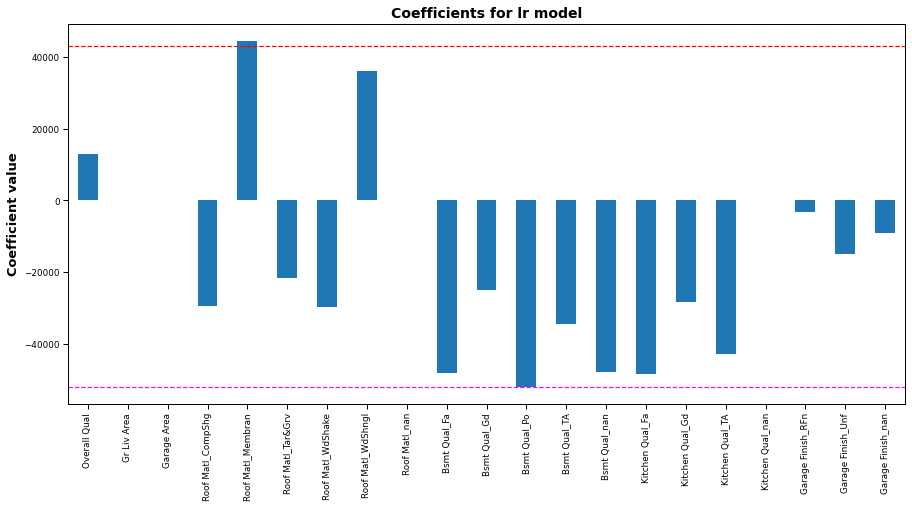

In [87]:
# Plot graph to show coefficients in lr model

graph_lr = pd.Series(lr.coef_, index = X_train_selected.columns).plot.bar(figsize=(15,7));
graph_lr.set_title('Coefficients for lr model', fontsize = 14, fontweight = 'bold');
graph_lr.set_ylabel('Coefficient value', fontweight = 'bold');
graph_lr.axhline(y = 43_000, color = 'red', ls = '--');
graph_lr.axhline(y = -52_000, color = 'magenta', ls = '--');

##### Observations from the graph of coefficient values in <span style = 'color:teal'> lr</span> model

1) The roof material and basement quality has a strong effect on SalePrice. Here, the excellent external condition quality is used as the base. For properties that do not have excellent quality, they are penalized accordingly. A property with poor basement quality has a negative coefficient around -52,000.

Bsmt Qual is the basement quality, where the height of the basement is rated as below:

|Rating|Description|
|---|---|
       |Ex|	Excellent (100+ inches)|	
       |Gd|	Good (90-99 inches)|
       |TA|	Typical (80-89 inches)|
       |Fa|	Fair (70-79 inches)|
       |Po|	Poor (<70 inches|
       |NA|	No Basement|
       
Based on the article below, it seems that a good quality basement can add value to the house. Hence it may explain why basement quality has a strong effect on the SalePrice.

https://www.thebalancesmb.com/pros-of-finishing-a-basement-for-property-investors-2124861#:~:text=In%20the%20United%20States%2C%20on,the%20property%20by%20about%20%247%2C000.

2) For roofs built with wood shingles and membrane, they have a huge positive effect on the SalePrice of the house. It may imply buyers seem to prefer houses with roofs built with such materials and value them highly.

3) From the link below, roofing materials have different durabilities and price. Here, the materials listed in 1) seems to be the most popular based on the lr model. Wood is a natural insulator, it can help to keep the temperature of the house consistent. It may be commonly chosen because it can help to save bills by reducing the usage or air conditioner or heater.

https://housemethod.com/maintenance/6-best-roofing-materials-ranked-by-durability-and-cost/

# Build <span style = 'color:blue'> Ridge linear regression model (Ridge)</span> 

* The selected variables will be standardized before constructing the Ridge model. The dummy coded categorical variables will need to be standardized as well. If there is no standadization, the features will be penalized only because of their scale. Also, standardizing avoids penalizing the intercept, which will not make intuitive sense.

# <span style = 'color:red'> The standard scaler has been fitted with the 21 selected variables from the train data, X_train_selected. This scaler will be used to scale the Kaggle test data later so that the scaling is consistent. </span> 

In [88]:
# initiate scaler, StandardScaler will be used to do the scaling.
ss = StandardScaler()

# use StandardScaler to scale X_train_selected
ss.fit(X_train_selected)

# transform the corresponding data using the fitted standard scaler
X_train_selected_scaled = ss.transform(X_train_selected)
X_validate_selected_scaled = ss.transform(X_validate_selected)

In [89]:
# initialize ridge model
ridge = RidgeCV(alphas = (10, 200, 100), cv = 5)

# Test <span style = 'color:blue'> Ridge </span>  with cross_val_score 

### Get <span style = 'color:red'> baseline </span> score for <span style = 'color:blue'> ridge </span> linear regression model (ridge). Baseline score is the estimation of the performance of the model by using k-fold cross validation. The training data for X and y is used in this case.

In [90]:
# baseline score for ridge
print('Estimated RMSE (root MSE) is', round(np.sqrt(-cross_val_score(ridge, X_train_selected_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error').mean())))

R2 = cross_val_score(ridge, X_train_selected_scaled, y_train, cv = 5, scoring = 'r2').mean()
print('Estimated R2 is', round(R2,5))

print('Estimated Adjusted R2 is', adjusted_r2(R2, X_train_selected_scaled, X_train_selected_scaled))

Estimated RMSE (root MSE) is 25709.0
Estimated R2 is 0.81467
Estimated Adjusted R2 is 0.81215


###  <span style = 'color:red'> Validate </span> <span style = 'color:blue'> Ridge </span>  using validation data. The validation data is not seen by the model before. It is used to simulate unseen data and estimate how well the model is performing when given unseen data.

* By comparing the validate and baseline, the RMSE from validate is better than baseline; 25709 vs 35190 respectively. 
* The Adjusted R2 score from validate is worse than baseline; 0.62335 vs 0.81215 respectively. 
* The features seem to have significant effect on the dependent variable SalePrice. The difference between R2 score and    
  Adjusted R2 score in validation is small (0.02023).


In [91]:
# validate ridge model
ridge.fit(X_train_selected_scaled, y_train)
ridge_pred = ridge.predict(X_validate_selected_scaled)

print('Ridge RMSE (root MSE) is' , round(np.sqrt(mean_squared_error(y_validate, ridge_pred))))

R2 = r2_score(y_validate, ridge_pred)

print('Ridge R2 is', round(R2,5))

print('Ridge Adjusted R2 is', adjusted_r2(R2, X_validate_selected_scaled, X_validate_selected_scaled))

print('Difference between R2 and Adjusted R2 is', round(R2 - 0.62335,5))

Ridge RMSE (root MSE) is 35190.0
Ridge R2 is 0.64358
Ridge Adjusted R2 is 0.62335
Difference between R2 and Adjusted R2 is 0.02023


In [92]:
# Optimal alpha value chosen from RidgeCV
ridge.alpha_

10

In [93]:
# Intercept value
ridge.intercept_

169485.67284345048

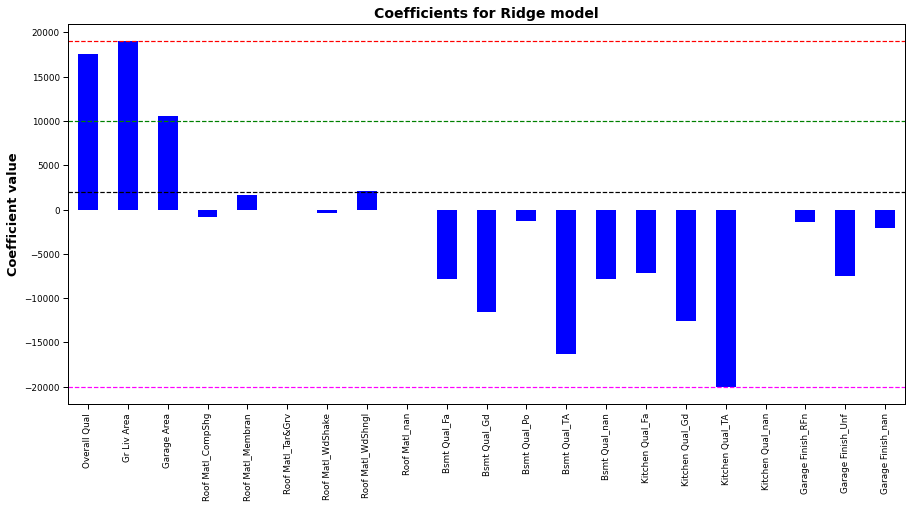

In [94]:
# Plot graph to show coefficients in Ridge model
graph_ridge = pd.Series(ridge.coef_, index = X_train_selected.columns).plot.bar(figsize=(15,7), color = 'blue');
graph_ridge.set_title('Coefficients for Ridge model', fontsize = 14, fontweight = 'bold');
graph_ridge.set_ylabel('Coefficient value', fontweight = 'bold');
graph_ridge.axhline(y = 19_000, color = 'red', ls = '--');
graph_ridge.axhline(y = 10_000, color = 'green', ls = '--');
graph_ridge.axhline(y = -20_000, color = 'magenta', ls = '--');
graph_ridge.axhline(y = 2000, color = 'black', ls = '--');

### Observations from the graph of coefficient values in <span style = 'color:blue'> Ridge </span> model

1) In the lr model, the roof material has an effect on the SalePrice. Here, looking at Roof Matl_Membran, Roof Matl_WdShngl, their effect on the SalePrice is small. Their coefficient values are around 2,000.

2) Comparing the coefficient values for the high impact features mentioned in 1), they still have a positive impact on SalePrice, but it is reduced.

3) Garage Area is seen to have a stronger effect on SalePrice, its coefficient is around 10,000. It may be immportant because Americans tend to have their own private transport hence the need for a sizable garage.

4) Kitchen quality also has an effect on SalePrice, its coefficient is around -20,000. It may be immportant because Americans may prefer to cook often.

5) Gr Liv Area and Overall Qual became the features with the highest impact on SalePrice, Gr Liv Area being the first with coefficient value at around 19,000 followed by Overall Qual with coefficient value at around 17,000.

6) For categorical variables, 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Kitchen Qual', 'Garage Qual', their quality / condition is rated as:
   
|Rating|Description|
|---|---|
       |Ex |  Excellent|
      | Gd|	Good|
      | TA|	Typical/Average|
       |Fa	|Fair|
      | Po|	Poor|
       |NA	|No Garage|
       
**Ex is the baseline rating for this model. To avoid the dummy variable trap in regression model it was dropped during the categorical variable to discrete variable transformation process. Using an example, if the house kitchen quality is typical rating, it will be 16,000 lesser than a house with excellent quality kitchen, if both houses have the same score / rating for other features.**

7) **Overall Qual** is overall quality of the house, which is a categorical variable which consists of ratings 1 to 10. **GrLivArea** is the Above grade (ground) living area square feet. By referring to the document in the link below, it refers to the total finished square footage measured at and above ground level as it appears from the front view of the building. It consists of the main floor plus any floors above that are finished. To be considered finished, the area must have flooring wall covering (trimmed), and ceiling. Here, it shows that buyers value the degree of finishing for the main floor and second floor, and the overall quality of the house. It makes sense because buyers will prefer good quality houses so that they can minimize the cost of refurbishing the house again. However, this is subjected to the requirements of the buyers; if they wish to customize their own house, they may go for cheaper houses with poorer finishings.

https://cms.cws.net/content/semnrealtors.com/files/Finished%20Above%20Grade%20Square%20Feet.pdf

8) Bsmt Qual is the basement quality, where the height of the basement is rated as below:

|Rating|Description|
|---|---|
       |Ex|	Excellent (100+ inches)|	
       |Gd|	Good (90-99 inches)|
       |TA|	Typical (80-89 inches)|
       |Fa|	Fair (70-79 inches)|
       |Po|	Poor (<70 inches|
       |NA|	No Basement|
       
Based on the article below, it seems that a good quality basement can add value to the house. Hence it may explain why basement quality has a strong effect on the SalePrice.

https://www.thebalancesmb.com/pros-of-finishing-a-basement-for-property-investors-2124861#:~:text=In%20the%20United%20States%2C%20on,the%20property%20by%20about%20%247%2C000.

# Build <span style = 'color:orange'> lasso </span> linear regression model

In [95]:
# initialize lasso model
lasso = LassoCV(cv = 5)

# Test the <span style = 'color:orange'> lasso </span> linear regression model with cross_val_score

### Get <span style = 'color:red'> baseline </span> score for <span style = 'color:orange'> lasso </span> linear regression model (lasso). Baseline score is the estimation of the performance of the model by using k-fold cross validation. The training data for X and y is used in this case.

In [96]:
# baseline score for lasso
print('Estimated RMSE (root MSE) is', round(np.sqrt(-cross_val_score(lasso, X_train_selected_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error').mean())))

R2 = cross_val_score(lasso, X_train_selected_scaled, y_train, cv = 5, scoring = 'r2').mean()
print('Estimated R2 is', round(R2,5))

print('Estimated Adjusted R2 is', adjusted_r2(R2, X_train_selected_scaled, X_train_selected_scaled))

Estimated RMSE (root MSE) is 25723.0
Estimated R2 is 0.81444
Estimated Adjusted R2 is 0.81192


###  <span style = 'color:red'> Validate </span> <span style = 'color:orange'> lasso </span> linear regression model (lasso) using validation data. The validation data is not seen by the model before. It is used to simulate unseen data and estimate how well the model is performing when given unseen data.

* By comparing the validate and baseline, the RMSE from validate is better than baseline; 35102 vs 25723 respectively. 
* The Adjusted R2 score from validate is better than baseline; 0.62523 vs 0.81192 respectively. 
* The features seem to have significant effect on the dependent variable SalePrice. The difference between R2 score and    
  Adjusted R2 score in validation is small (0.02013).

In [97]:
# validate lasso model
lasso.fit(X_train_selected_scaled, y_train)
lasso_pred = lasso.predict(X_validate_selected_scaled)

print('lasso RMSE (root MSE) is' , round(np.sqrt(mean_squared_error(y_validate, lasso_pred))))

R2 = r2_score(y_validate, lasso_pred)

print('lasso R2 is', round(R2,5))

print('lasso Adjusted R2 is', adjusted_r2(R2, X_validate_selected_scaled, X_validate_selected_scaled))

print('Difference between R2 and Adjusted R2 is', round(R2 - 0.62523,5))

lasso RMSE (root MSE) is 35102.0
lasso R2 is 0.64536
lasso Adjusted R2 is 0.62523
Difference between R2 and Adjusted R2 is 0.02013


In [98]:
# Optimal alpha value chosen from RidgeCV
lasso.alpha_

47.311908827505995

In [99]:
# Intercept value
lasso.intercept_

169485.67284345048

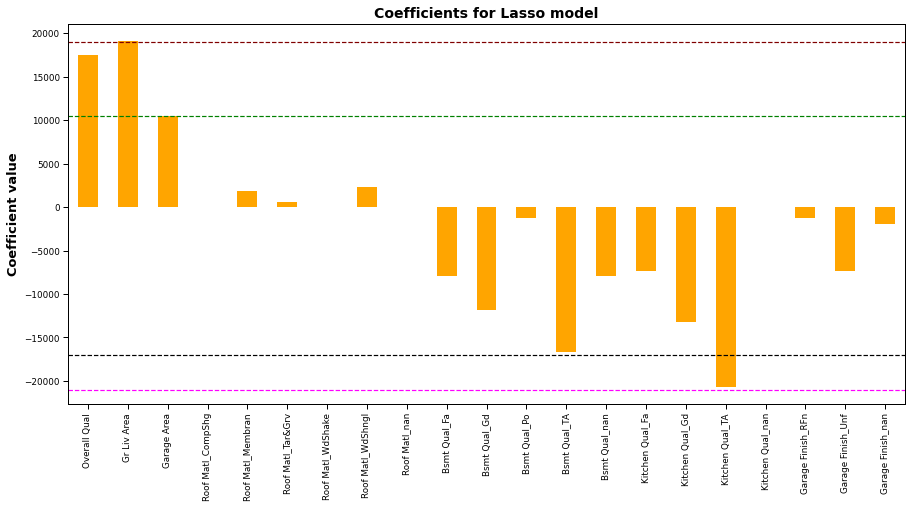

In [100]:
# Plot graph to show coefficients in lasso model
graph_lasso = pd.Series(lasso.coef_, index = X_train_selected.columns).plot.bar(figsize=(15,7), color = 'orange');
graph_lasso.set_title('Coefficients for Lasso model', fontsize = 14, fontweight = 'bold');
graph_lasso.set_ylabel('Coefficient value', fontweight = 'bold');
graph_lasso.axhline(y = 19_000, color = 'maroon', ls = '--');
graph_lasso.axhline(y = 10_500, color = 'green', ls = '--');
graph_lasso.axhline(y = -21_000, color = 'magenta', ls = '--');
graph_lasso.axhline(y = -17_000, color = 'black', ls = '--');

### Observations from the graph of coefficient values in <span style = 'color:orange'> Lasso </span> model

1) Similar to the Ridge model, looking at Roof Matl_Membran, Roof Matl_WdShngl, their effect on the SalePrice is small. Their coefficient values are around 2,000.

2) Similar to ridge model, Gr Liv Area and Overall Qual are still the features with the highest impact on SalePrice, Gr Liv Area and Overall Qual have coefficient values at around 23,000, followed by Garage Area with coefficient value at around 12,500. In the lr model, these features have little effect on SalePrice.

3) Similar to ridge model, garage area has an effect on SalePrice.

4) Similar to ridge model, Exter Qual, Bsmt Qual, Kitchen Qual and Bmst Qual have a strong effect on SalePrice. The coefficient value is around -17,000 for Basement quality and -20,000 for kitchen quality.

# Use linear regression, ridge linear regression, lasso linear regression models to predict SalePrice in Kaggle Test data

In [101]:
# Import Kaggle Test data
K = pd.read_csv('./datasets/test.csv')

In [102]:
# Check the number of null values in selected numerical variables
K[['Overall Qual', 'Gr Liv Area', 'Garage Area']].isnull().sum()

Overall Qual    0
Gr Liv Area     0
Garage Area     0
dtype: int64

In [103]:
# Transform Kaggle Test data
kaggle = pd.get_dummies(K, drop_first = True, dummy_na = True)
kaggle.shape

(879, 273)

### Check if all the selected features are in Kaggle Test data

In [104]:
selected_features = ['Overall Qual',
'Gr Liv Area',
'Garage Area',
'Roof Matl_CompShg',
'Roof Matl_Membran',
'Roof Matl_Tar&Grv',
'Roof Matl_WdShake',
'Roof Matl_WdShngl',
'Roof Matl_nan',
'Bsmt Qual_Fa',
'Bsmt Qual_Gd',
'Bsmt Qual_Po',
'Bsmt Qual_TA',
'Bsmt Qual_nan',
'Kitchen Qual_Fa',
'Kitchen Qual_Gd',
'Kitchen Qual_TA',
'Kitchen Qual_nan',
 'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Finish_nan']

[a for a in selected_features if not a in kaggle.columns]

['Roof Matl_CompShg', 'Roof Matl_Membran']

The features below are not in Kaggle Test data:

* Roof Matl_CompShg
* Roof Matl_Membran

In [105]:
# create dummy columns in kaggle
kaggle['Roof Matl_CompShg'] = 0
kaggle['Roof Matl_Membran'] = 0

# Select features from Kaggle Test data that will be used to predict SalePrice

In [106]:
kaggle_select = kaggle[['Overall Qual',
'Gr Liv Area',
'Garage Area',
'Roof Matl_CompShg',
'Roof Matl_Membran',
'Roof Matl_Tar&Grv',
'Roof Matl_WdShake',
'Roof Matl_WdShngl',
'Roof Matl_nan',                      
'Bsmt Qual_Fa',
'Bsmt Qual_Gd',
'Bsmt Qual_Po',
'Bsmt Qual_TA',
'Bsmt Qual_nan',
'Kitchen Qual_Fa',
'Kitchen Qual_Gd',
'Kitchen Qual_TA',
'Kitchen Qual_nan',
 'Garage Finish_RFn',
 'Garage Finish_Unf',
 'Garage Finish_nan']]

In [107]:
len(kaggle_select.columns)

21

# Scale the data for ridge and lasso.
* The same standard scaler used in scaling training data will be used for Kaggle test data also to maintain consistency.
* if a different scaler is used, it is not possible to evaluate model performance against Kaggle test data.

In [108]:
# transform the corresponding data using the fitted standard scaler
kaggle_select_scaled = ss.transform(kaggle_select)

# Predict SalePrice from Kaggle test data with models.
* As the models are trained with training data previously, they will be used to predict SalePrice using Kaggle test data.

In [109]:
# predict using linear regression model (lr)
lr_result = lr.predict(kaggle_select)

# predict using ridge regression model (ridge)
ridge_result = ridge.predict(kaggle_select_scaled)

# predict using lasso regression model (lasso)
lasso_result = lasso.predict(kaggle_select_scaled)

# Process predictions and export as CSV

In [110]:
submit_lr = pd.DataFrame({'Id': kaggle['Id'],
                      'SalePrice': lr_result}).sort_values(by = 'Id', ascending = True)

submit_ridge = pd.DataFrame({'Id': kaggle['Id'],
                     'SalePrice': ridge_result}).sort_values(by = 'Id', ascending = True)

submit_lasso = pd.DataFrame({'Id': kaggle['Id'],
                     'SalePrice': lasso_result}).sort_values(by = 'Id', ascending = True)

In [111]:
submit_lr

Id      SalePrice
704     2  156209.553928
706     4  282058.889171
120     6  216179.113229
312     7  245780.749005
401    17  241696.914734
..    ...            ...
537  2919  120312.258339
179  2921  129006.600413
829  2922  197505.315778
669  2925  162631.150665
675  2928  137508.181679

[879 rows x 2 columns]

In [112]:
# export data
submit_lr.to_csv('submit_lr_24Nov.csv', index = False)

submit_ridge.to_csv('submit_ridge_24Nov.csv', index = False)

submit_lasso.to_csv('submit_lasso_24Nov.csv', index = False)

# Kaggle Test Results

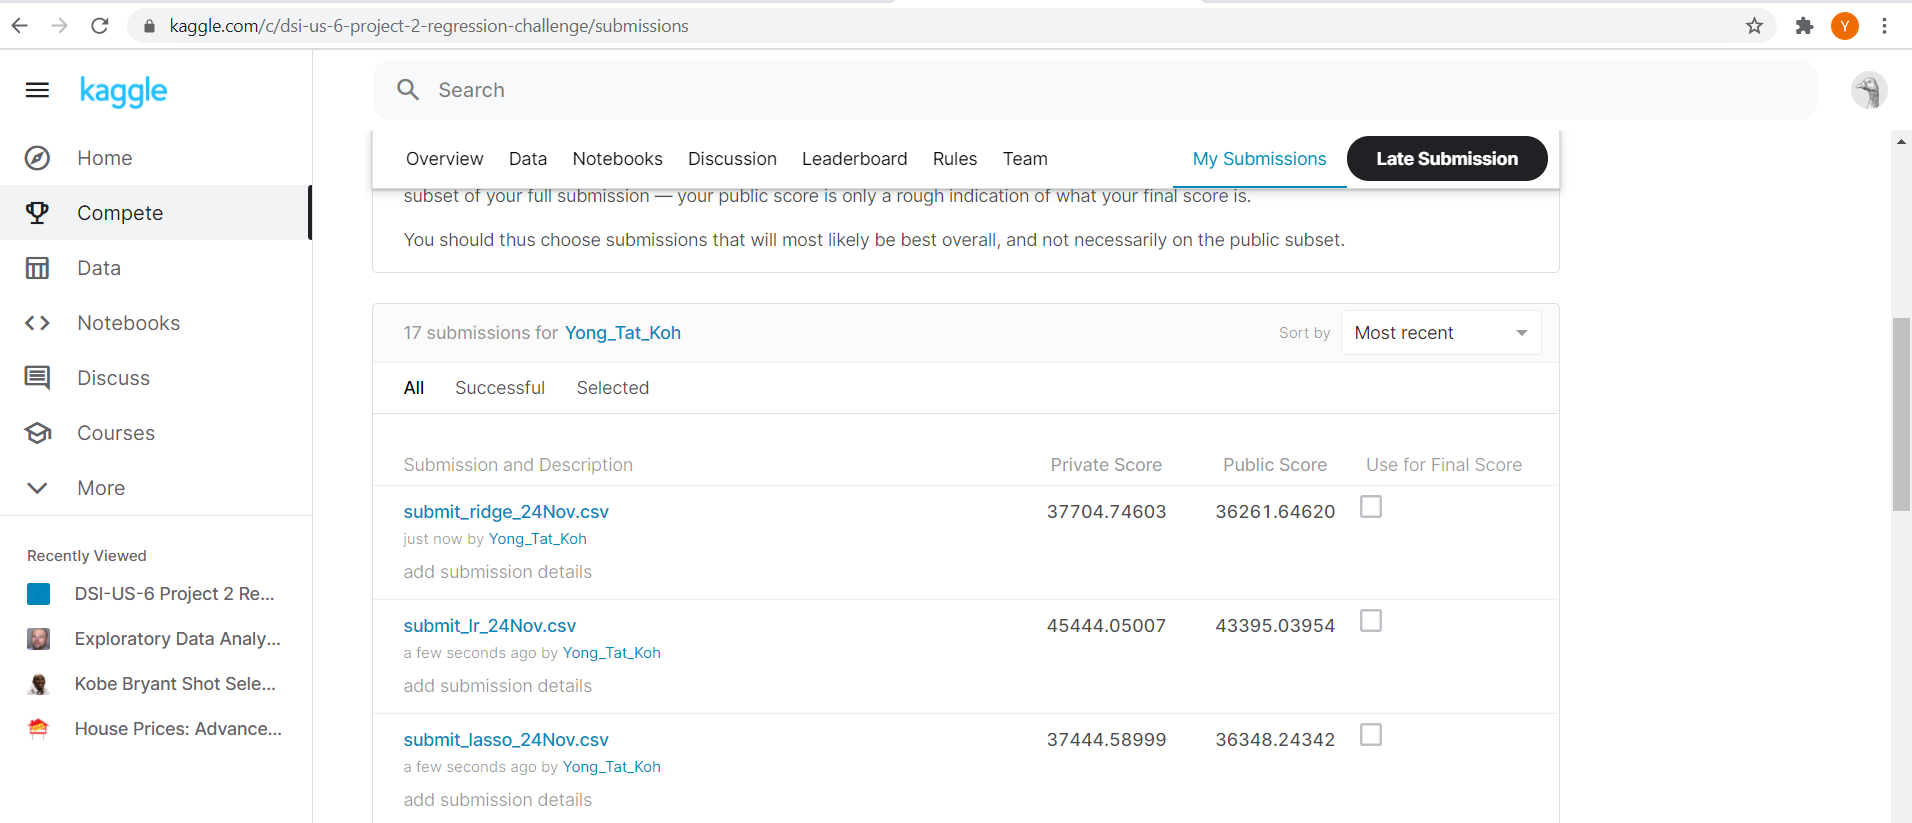

* The Ridge and Lasso Regression models have very close scores.
* The RMSE of lasso is close to its estimated score 35102 (estimated) vs 37444 (kaggle test data).